# Data analysis

## 01 라이브러리 불러오기

In [292]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
from datetime import datetime
from datetime import date
import datetime as date
from datetime import timedelta
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']=False

## 02 데이터 불러오기

In [293]:
import psycopg2 # driver 임포트

# conn = psycopg2.connect("host=localhost dbname=test user=postgres password=pwtest port=5432")
conn = psycopg2.connect(host='portwebsite.cictpybqx5bj.ap-northeast-2.rds.amazonaws.com', 
dbname='portwebsite_db', user='FIREMOTH', password='glacksqnfskqkd1!', port='5432') # db에 접속

### (1) 선박입출항현황 데이터

In [294]:
for i in range(2017, 2022):
    for j in range(1, 13):
        if(i== 2017 and j== 1):
            SADS_data = pd.read_csv('/home/ubuntu/MachineLearning/AI/Data/ShipsArrivalandDepartureStatus/%d.SADS/%d.%d.선박입출항.csv'%(i,i, j), encoding='utf-8')
            SADS_data = SADS_data.drop([0,1,2,3,4,5,6,7,8,9,10,11],axis=0)
            SADS_data.columns = ['항명', '호출부호','선명', '입항횟수1', '입항횟수2', '구분','외내','입출','총톤수','국제톤수','징수톤수','입항일시','출항일시', 'CIO수속일시','수리일시', '항해구분', 'MRN 번호','국적1','국적2', '계선장소1','계선장소2','계선장소3','차항지','전출항지','선박용도','승무원(한국인)','승무원(외국인)','승객','예선', '도선','부선호출부호1','부선호출부호2']
        else:
            if(i== 2021 and j==7):
                break
            SADS_data1 = pd.read_csv('/home/ubuntu/MachineLearning/AI/Data/ShipsArrivalandDepartureStatus/%d.SADS/%d.%d.선박입출항.csv'%(i, i, j))
            SADS_data1 = SADS_data1.drop([0,1,2,3,4,5,6,7,8,9,10,11],axis=0)
            SADS_data1.columns = ['항명', '호출부호','선명', '입항횟수1', '입항횟수2', '구분','외내','입출','총톤수','국제톤수','징수톤수','입항일시','출항일시', 'CIO수속일시','수리일시', '항해구분', 'MRN 번호','국적1','국적2', '계선장소1','계선장소2','계선장소3','차항지','전출항지','선박용도','승무원(한국인)','승무원(외국인)','승객','예선', '도선','부선호출부호1','부선호출부호2']
            #print(f'{j}월 데이터: {len(data1)}')
            SADS_data = pd.concat([SADS_data, SADS_data1])
            SADS_data.reset_index(drop=True, inplace = True)   

In [295]:
SADS_data

,항명,호출부호,선명,입항횟수1,입항횟수2,구분,외내,입출,총톤수,국제톤수,...,차항지,전출항지,선박용도,승무원(한국인),승무원(외국인),승객,예선,도선,부선호출부호1,부선호출부호2
0,울산,V7RW2,AFRICA GAS,2017,001,최초,외항,출항,"25,098","25,098",...,NaN,NaN,신조선,NaN,21,2,N,N,NaN,NaN
1,울산,975652,97대광호,2015,001,최종,내항,출항,141,141,...,부산,부산,급유선,2,1,3,N,N,NaN,NaN
2,울산,978218,유림5호,2016,001,최종,내항,출항,190,190,...,울산,기타항,이.접안용 예선,5,NaN,NaN,N,N,NaN,NaN
3,울산,114432,31 신흥호,2016,006,최종,내항,출항,119,119,...,기타항,기타항,견인용예선,2,1,NaN,N,N,NaN,NaN
4,울산,698123,제5동방,2016,014,최종,내항,출항,44,44,...,기타항,기타항,견인용예선,1,1,NaN,N,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214571,울산,9V9557,BOW DALIAN,2021,007,최종,외항,입항,"6,583","6,583",...,SHANGHAI,여수,석유제품 운반선,NaN,21,NaN,Y,Y,NaN,NaN
214572,울산,5VEH4,XINGHE 9,2021,001,최종,외항,입항,"1,495","1,495",...,ZHOUSHAN PT,부산,일반화물선,NaN,9,NaN,Y,Y,NaN,NaN
214573,울산,130093,삼원,2021,041,최종,내항,입항,699,0,...,기타항,기타항,석유제품 운반선,4,4,0,N,N,NaN,NaN
214574,울산,200013,유성,2021,074,최종,내항,입항,"1,998",0,...,마산,마산,석유제품 운반선,7,5,0,Y,N,NaN,NaN


### (2) 시설사용현황 데이터

In [296]:
for i in range(2017, 2022):
    for j in range(1, 13):
        if(i== 2017 and j== 1):
            FUPS_data = pd.read_csv('/home/ubuntu/MachineLearning/AI/Data/FacilityUsePermitStatus/%d.FUPS/%d.%d.시설사용.csv'%(i, i, j))
            FUPS_data = FUPS_data.drop([0,1,2],axis=0)
            FUPS_data.columns = ['순번','호출부호','입항횟수1','입항횟수2','입항횟수3','신고톤수','선박명','선사/대리점1','선사/대리점2','신청시설1','신청시설2','신청시설3','신청일시1(FROM ~ TO)','신청일시2(FROM ~ TO)','지정시설1','지정시설2','지정시설3','지정일시1(FROM ~ TO)','지정일시2(FROM ~ TO)','사용목적명','예보일시','허가유무']
        else:
            if(i== 2021 and j==7):
                break
            FUPS_data1 = pd.read_csv('/home/ubuntu/MachineLearning/AI/Data/FacilityUsePermitStatus/%d.FUPS/%d.%d.시설사용.csv'%(i, i, j))
            FUPS_data1 = FUPS_data1.drop([0,1,2],axis=0)
            FUPS_data1.columns = ['순번','호출부호','입항횟수1','입항횟수2','입항횟수3','신고톤수','선박명','선사/대리점1','선사/대리점2','신청시설1','신청시설2','신청시설3','신청일시1(FROM ~ TO)','신청일시2(FROM ~ TO)','지정시설1','지정시설2','지정시설3','지정일시1(FROM ~ TO)','지정일시2(FROM ~ TO)','사용목적명','예보일시','허가유무']
            #print(f'{j}월 데이터: {len(data1)}')
            FUPS_data = pd.concat([FUPS_data, FUPS_data1])
            FUPS_data.reset_index(drop=True, inplace = True) 

In [297]:
FUPS_data

,순번,호출부호,입항횟수1,입항횟수2,입항횟수3,신고톤수,선박명,선사/대리점1,선사/대리점2,신청시설1,...,신청일시1(FROM ~ TO),신청일시2(FROM ~ TO),지정시설1,지정시설2,지정시설3,지정일시1(FROM ~ TO),지정일시2(FROM ~ TO),사용목적명,예보일시,허가유무
0,1,D7BN,2016,019,001,8.581,우동,OST0212,우민해운(주),WAE,...,2016-12-28 06:15,2016-12-28 07:45,WAE,03,정박지-E3,2016-12-28 06:15,2016-12-28 07:45,접안대기,2017-01-01,허가완료
1,2,D7BN,2016,019,002,8.581,우동,OST0212,우민해운(주),MBA,...,2016-12-28 08:45,2016-12-29 01:45,MBA,01,양곡부두,2016-12-28 08:45,2016-12-29 01:45,양하,2017-01-01,허가완료
2,3,D7BN,2016,019,003,8.581,우동,OST0212,우민해운(주),WAE,...,2016-12-29 06:45,2016-12-30 06:40,WAE,01,정박지-E1,2016-12-29 06:45,2016-12-30 06:40,접안대기,2017-01-01,허가완료
3,4,D7BN,2016,019,004,8.581,우동,OST0212,우민해운(주),MDS,...,2016-12-30 07:45,2016-12-31 19:30,MDS,01,S-OIL1부두,2016-12-30 07:45,2016-12-31 19:30,적하,2017-01-01,허가완료
4,5,075682,2017,001,001,5.946,NaN,YSK0018,한선해운(주),MBR,...,2017-01-01 23:00,2017-01-02 12:00,MBR,01,UTK부두,2017-01-02 04:25,2017-01-02 18:05,양하,2017-01-01,허가완료
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223278,4145,D7RI,2021,003,001,6.843,라용 케미,YSZ2381,선우탱커 주식회사,WAB,...,2021-06-27 14:35,2021-06-27 21:05,WAB,02,벙커링전용정박지 E2,2021-06-27 14:35,2021-06-27 21:05,접안대기,2021-06-30,허가완료
223279,4146,3EIT4,2021,001,001,4.301,MORNING HOPE,USC2025,제이엠쉬핑(주),WAE,...,2021-06-25 10:30,2021-06-28 12:30,NaN,NaN,NaN,NaN,NaN,접안대기,2021-06-30,미허가
223280,4147,200035,2021,029,001,497,우원호,BSZ3327,우원마린 주식회사,MLJ,...,2021-07-03 06:00,2021-07-03 20:00,NaN,NaN,NaN,NaN,NaN,접안대기,2021-06-30,미허가
223281,4148,088238,2021,084,001,700,3동주,USK0074,영우해운(주),MBU,...,2021-07-01 07:00,2021-07-01 16:00,NaN,NaN,NaN,NaN,NaN,적하,2021-06-30,미허가


### (3) 날씨 데이터

In [298]:
cur = conn.cursor()

# select
cur.execute("SELECT * FROM past_weather_ml")
weather = pd.DataFrame(list(cur.fetchall()), columns=['지점', '일시', '풍속', '풍향', 'GUST풍속', '현지기압', '습도', '기온', '수온', '최대파고', '유의파고', '평균파고', '파주기', '파향', 'N'])

# weather 데이터 '일시'를 기준으로 sort
weather.sort_values(by=['일시'], inplace=True)

# index reset
weather = weather.reset_index(drop=True)

weather

,지점,일시,풍속,풍향,GUST풍속,현지기압,습도,기온,수온,최대파고,유의파고,평균파고,파주기,파향,N
0,22189,2017-01-01 10:00,3.9,338.0,6.1,1029.4,56.0,8.7,16.0,1.5,0.9,0.6,4.6,38.0,None
1,22189,2017-01-01 11:00,6.0,334.0,8.4,1029.9,56.0,8.9,16.0,1.4,0.9,0.6,4.9,103.0,None
2,22189,2017-01-01 12:00,4.0,293.0,5.9,1029.2,59.0,9.1,16.0,1.3,0.8,0.6,8.0,175.0,None
3,22189,2017-01-01 13:00,4.2,260.0,5.9,1028.2,58.0,9.7,16.0,1.4,0.8,0.6,8.0,165.0,None
4,22189,2017-01-01 14:00,4.0,273.0,6.4,1027.3,66.0,9.9,16.0,1.0,0.7,0.5,7.1,177.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37598,22189,2021-07-22 6:00,6.5,57.0,7.9,1011.2,92.0,28.5,27.0,1.8,1.0,0.7,4.9,70.0,None
37599,22189,2021-07-22 7:00,7.0,56.0,8.3,1011.4,92.0,28.6,27.0,1.5,0.9,0.7,4.9,72.0,None
37600,22189,2021-07-22 8:00,5.8,62.0,7.0,1012.0,92.0,28.9,27.0,1.3,0.9,0.6,4.9,66.0,None
37601,22189,2021-07-22 9:00,5.1,60.0,6.6,1012.0,91.0,28.7,27.0,1.4,0.9,0.6,5.3,80.0,None


### (4) Data information

In [299]:
SADS_data.info()
print("---------------------------------------------------")
FUPS_data.info()
print("---------------------------------------------------")
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214576 entries, 0 to 214575
Data columns (total 32 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   항명        214576 non-null  object
 1   호출부호      214576 non-null  object
 2   선명        214576 non-null  object
 3   입항횟수1     214576 non-null  object
 4   입항횟수2     214576 non-null  object
 5   구분        214576 non-null  object
 6   외내        214562 non-null  object
 7   입출        214576 non-null  object
 8   총톤수       214383 non-null  object
 9   국제톤수      214383 non-null  object
 10  징수톤수      214385 non-null  object
 11  입항일시      214576 non-null  object
 12  출항일시      214562 non-null  object
 13  CIO수속일시   120065 non-null  object
 14  수리일시      214326 non-null  object
 15  항해구분      214409 non-null  object
 16  MRN 번호    104480 non-null  object
 17  국적1       214378 non-null  object
 18  국적2       214378 non-null  object
 19  계선장소1     214496 non-null  object
 20  계선장소2     214496 non-null 

## 03 데이터 전처리

## 03-1 선박입출항현황 데이터 결측치 처리

In [300]:
# 결측치 확인
print('SADS(선박입출항) : ', SADS_data.isnull().sum())

SADS(선박입출항) :  항명               0
호출부호             0
선명               0
입항횟수1            0
입항횟수2            0
구분               0
외내              14
입출               0
총톤수            193
국제톤수           193
징수톤수           191
입항일시             0
출항일시            14
CIO수속일시      94511
수리일시           250
항해구분           167
MRN 번호      110096
국적1            198
국적2            198
계선장소1           80
계선장소2           80
계선장소3           80
차항지            626
전출항지           624
선박용도           150
승무원(한국인)     51328
승무원(외국인)      3668
승객          135844
예선            9051
도선             201
부선호출부호1     199685
부선호출부호2     214557
dtype: int64


In [301]:
SADS_data

,항명,호출부호,선명,입항횟수1,입항횟수2,구분,외내,입출,총톤수,국제톤수,...,차항지,전출항지,선박용도,승무원(한국인),승무원(외국인),승객,예선,도선,부선호출부호1,부선호출부호2
0,울산,V7RW2,AFRICA GAS,2017,001,최초,외항,출항,"25,098","25,098",...,NaN,NaN,신조선,NaN,21,2,N,N,NaN,NaN
1,울산,975652,97대광호,2015,001,최종,내항,출항,141,141,...,부산,부산,급유선,2,1,3,N,N,NaN,NaN
2,울산,978218,유림5호,2016,001,최종,내항,출항,190,190,...,울산,기타항,이.접안용 예선,5,NaN,NaN,N,N,NaN,NaN
3,울산,114432,31 신흥호,2016,006,최종,내항,출항,119,119,...,기타항,기타항,견인용예선,2,1,NaN,N,N,NaN,NaN
4,울산,698123,제5동방,2016,014,최종,내항,출항,44,44,...,기타항,기타항,견인용예선,1,1,NaN,N,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214571,울산,9V9557,BOW DALIAN,2021,007,최종,외항,입항,"6,583","6,583",...,SHANGHAI,여수,석유제품 운반선,NaN,21,NaN,Y,Y,NaN,NaN
214572,울산,5VEH4,XINGHE 9,2021,001,최종,외항,입항,"1,495","1,495",...,ZHOUSHAN PT,부산,일반화물선,NaN,9,NaN,Y,Y,NaN,NaN
214573,울산,130093,삼원,2021,041,최종,내항,입항,699,0,...,기타항,기타항,석유제품 운반선,4,4,0,N,N,NaN,NaN
214574,울산,200013,유성,2021,074,최종,내항,입항,"1,998",0,...,마산,마산,석유제품 운반선,7,5,0,Y,N,NaN,NaN


In [302]:
SADS_data.columns

Index(['항명', '호출부호', '선명', '입항횟수1', '입항횟수2', '구분', '외내', '입출', '총톤수', '국제톤수',
       '징수톤수', '입항일시', '출항일시', 'CIO수속일시', '수리일시', '항해구분', 'MRN 번호', '국적1',
       '국적2', '계선장소1', '계선장소2', '계선장소3', '차항지', '전출항지', '선박용도', '승무원(한국인)',
       '승무원(외국인)', '승객', '예선', '도선', '부선호출부호1', '부선호출부호2'],
      dtype='object')

In [303]:
# 사용하지 않는 columns 삭제
# '부선호출부호1', '부선호출부호2', 'CIO수속일시', 'MRN 번호', '항명', '국제톤수', '징수톤수', '국적2' 삭제
cols = ['부선호출부호1', '부선호출부호2', 'CIO수속일시', 'MRN 번호', '항명', '국제톤수', '징수톤수', '국적2']
SADS_data.drop(labels=cols, axis = "columns", inplace = True)

### (1) 총톤수

In [304]:
# 선박입출항 데이터의 호출부호가 다음과 같을 때, 입항횟수2부터 출항일시까지 출력
SADS_data.loc[SADS_data['호출부호']=='975652', '입항횟수2':'출항일시']

# 호출부호가 같은 열이 존재함을 알 수 있음

,입항횟수2,구분,외내,입출,총톤수,입항일시,출항일시
1,001,최종,내항,출항,141,2015-02-06 12:35,2017-01-11 03:50
2557,001,최종,내항,입항,141,2017-01-18 17:50,2018-05-04 04:40
63764,001,최종,내항,출항,141,2017-01-18 17:50,2018-05-04 04:40
65398,001,최초,내항,입항,141,2018-05-12 15:30,2019-05-12 15:30
111024,001,최초,내항,출항,141,2018-05-12 15:30,2019-05-12 15:30


In [305]:
# 총톤수 데이터 정리

SADS_data['총톤수'] = SADS_data['총톤수'].str.replace(",", "") # ',' 제거
SADS_data['총톤수'] = pd.to_numeric(SADS_data['총톤수'])

# 데이터를 살펴보면 총톤수는 선박의 톤수임
# 따라서 호출부호가 같다면 총톤수도 같을 것이라고 예상되므로, 같은 호출부호를 찾아 그 열의 총톤수로 결측치를 채움

flg_is_null = SADS_data['총톤수'].isnull()

for trg in list(SADS_data.loc[flg_is_null, '호출부호'].unique()) :
    weight = SADS_data.loc[(~flg_is_null) & (SADS_data['호출부호'] == trg), '총톤수'].mean()
    SADS_data['총톤수'].loc[(flg_is_null) & (SADS_data['호출부호'] == trg)] = weight

print('총톤수값이 null인 선박수:', SADS_data['총톤수'].isnull().sum())

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


총톤수값이 null인 선박수: 14


#### 질문

위처럼 대체했음에도 불구하고 결측치 14개 발생 -> 호출부호가 같은 것도 다 결측치이거나 호출부호가 같은 게 없는 것으로 예상됨

결측치 제거? 아니면 평균값이나 최빈값 대체?

#### -> 평균대체

In [306]:
# 총톤수 결측치 평균 대체

mean = SADS_data['총톤수'].mean() # 평균 구하기
SADS_data[SADS_data['총톤수'].isnull() == True] = mean # null인 열에 평균 넣어주기
print('총톤수값이 null인 선박수:', SADS_data['총톤수'].isnull().sum())

총톤수값이 null인 선박수: 0


### (2) 승무원(한국인), 승무원(외국인), 승객

승무원(한국인), 승무원(외국인), 승객의 결측치는 데이터를 살펴본 결과 0으로 예상됨

In [307]:
# SADS_data["승무원(한국인)"] 결측치 0으로 채우기
SADS_data["승무원(한국인)"] = SADS_data["승무원(한국인)"].fillna(0)
SADS_data["승무원(외국인)"] = SADS_data["승무원(외국인)"].fillna(0)
SADS_data["승객"] = SADS_data["승객"].fillna(0)

# 결측치 사라졌는지 재확인
print('SADS(선박입출항) 승무원(한국인) column : ', SADS_data["승무원(한국인)"].isnull().sum())
print('SADS(선박입출항) 승무원(외국인) column : ', SADS_data["승무원(외국인)"].isnull().sum())
print('SADS(선박입출항) 승객 column : ', SADS_data["승객"].isnull().sum())

SADS(선박입출항) 승무원(한국인) column :  0
SADS(선박입출항) 승무원(외국인) column :  0
SADS(선박입출항) 승객 column :  0


### (3) 항해구분

In [308]:
SADS_data.loc[SADS_data['호출부호']=='2IYH2', '외내':'전출항지']

# 호출부호가 같아도 항해구분은 다른 경우가 있음

,외내,입출,총톤수,입항일시,출항일시,수리일시,항해구분,국적1,계선장소1,계선장소2,계선장소3,차항지,전출항지
2727,외항,입항,30948.0,2017-01-19 15:48,2017-01-19 15:48,1950-01-01 00:00,NaN,NaN,WAE,03,정박지-E3,NaN,NaN
2728,외항,출항,30948.0,2017-01-19 15:48,2017-01-19 15:48,2017-01-20 14:00,신조선,IM,WAE,03,정박지-E3,NaN,NaN
15097,외항,출항,30948.0,2017-04-21 13:54,2017-04-23 08:24,2017-05-04 15:10,기타,IM,WAE,03,정박지-E3,SINGAPORE,DONGGI
15098,외항,입항,30948.0,2017-04-21 13:54,2017-04-23 08:24,2017-04-26 13:06,기타,IM,WAE,03,정박지-E3,SINGAPORE,DONGGI
15739,외항,입항,30948.0,2017-04-26 04:16,2017-05-04 02:05,2017-05-04 18:02,기타,IM,WAE,03,정박지-E3,TANJONG BIN,울산
16352,외항,출항,30948.0,2017-04-26 04:16,2017-05-04 02:05,2017-05-04 18:03,기타,IM,MDU,08,SK8부두,TANJONG BIN,울산
209801,외항,입항,30948.0,2021-05-23 23:30,2021-05-28 09:00,2021-05-24 10:24,기타,IM,WAE,03,정박지-E3,TANJONG BIN,LA PAZ
209802,외항,출항,30948.0,2021-05-23 23:30,2021-05-28 09:00,2021-05-28 16:10,기타,IM,WAE,03,정박지-E3,TANJONG BIN,LA PAZ


In [309]:
SADS_data.groupby("항해구분").count()

# 최빈값은 '기타'이므로 결측치는 '기타'로 채움

,호출부호,선명,입항횟수1,입항횟수2,구분,외내,입출,총톤수,입항일시,출항일시,...,계선장소2,계선장소3,차항지,전출항지,선박용도,승무원(한국인),승무원(외국인),승객,예선,도선
항해구분,,,,,,,,,,,,,,,,,,,,,
9144.964494593121,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
기타,211781,211781,211781,211781,211781,211781,211781,211781,211781,211781,...,211781,211781,211763,211765,211781,211781,211781,211781,202950,211781
내외항자격변경,1896,1896,1896,1896,1896,1896,1896,1896,1896,1896,...,1896,1896,1896,1896,1896,1896,1896,1896,1894,1896
선명변경,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
수출선박,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
신조선,465,465,465,465,465,465,465,465,465,465,...,430,430,21,21,465,465,465,465,428,430
"실습선,관공선",19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
외국적 내항선,120,120,120,120,120,120,120,120,120,120,...,120,120,120,120,120,120,120,120,105,120
원양조업선,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [310]:
# 호출부호가 같아도 항해구분은 다른 경우가 있음
# 대부분 기타에 해당하므로 결측치는 기타로 채워줌
SADS_data.groupby("항해구분").count()
SADS_data["항해구분"] = SADS_data["항해구분"].fillna('기타')

## 03-2 시설현황 데이터 결측치 처리

In [311]:
# 결측치 확인
print('FUPS(시설사용현황) : ', FUPS_data.isnull().sum())

FUPS(시설사용현황) :  순번                      0
호출부호                    0
입항횟수1                   0
입항횟수2                   0
입항횟수3                   0
신고톤수                    0
선박명                 18017
선사/대리점1                 0
선사/대리점2                 0
신청시설1                   0
신청시설2                   0
신청시설3                   0
신청일시1(FROM ~ TO)        0
신청일시2(FROM ~ TO)        0
지정시설1                 563
지정시설2                 563
지정시설3                 563
지정일시1(FROM ~ TO)      563
지정일시2(FROM ~ TO)      563
사용목적명               11607
예보일시                    0
허가유무                    0
dtype: int64


In [312]:
FUPS_data

,순번,호출부호,입항횟수1,입항횟수2,입항횟수3,신고톤수,선박명,선사/대리점1,선사/대리점2,신청시설1,...,신청일시1(FROM ~ TO),신청일시2(FROM ~ TO),지정시설1,지정시설2,지정시설3,지정일시1(FROM ~ TO),지정일시2(FROM ~ TO),사용목적명,예보일시,허가유무
0,1,D7BN,2016,019,001,8.581,우동,OST0212,우민해운(주),WAE,...,2016-12-28 06:15,2016-12-28 07:45,WAE,03,정박지-E3,2016-12-28 06:15,2016-12-28 07:45,접안대기,2017-01-01,허가완료
1,2,D7BN,2016,019,002,8.581,우동,OST0212,우민해운(주),MBA,...,2016-12-28 08:45,2016-12-29 01:45,MBA,01,양곡부두,2016-12-28 08:45,2016-12-29 01:45,양하,2017-01-01,허가완료
2,3,D7BN,2016,019,003,8.581,우동,OST0212,우민해운(주),WAE,...,2016-12-29 06:45,2016-12-30 06:40,WAE,01,정박지-E1,2016-12-29 06:45,2016-12-30 06:40,접안대기,2017-01-01,허가완료
3,4,D7BN,2016,019,004,8.581,우동,OST0212,우민해운(주),MDS,...,2016-12-30 07:45,2016-12-31 19:30,MDS,01,S-OIL1부두,2016-12-30 07:45,2016-12-31 19:30,적하,2017-01-01,허가완료
4,5,075682,2017,001,001,5.946,NaN,YSK0018,한선해운(주),MBR,...,2017-01-01 23:00,2017-01-02 12:00,MBR,01,UTK부두,2017-01-02 04:25,2017-01-02 18:05,양하,2017-01-01,허가완료
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223278,4145,D7RI,2021,003,001,6.843,라용 케미,YSZ2381,선우탱커 주식회사,WAB,...,2021-06-27 14:35,2021-06-27 21:05,WAB,02,벙커링전용정박지 E2,2021-06-27 14:35,2021-06-27 21:05,접안대기,2021-06-30,허가완료
223279,4146,3EIT4,2021,001,001,4.301,MORNING HOPE,USC2025,제이엠쉬핑(주),WAE,...,2021-06-25 10:30,2021-06-28 12:30,NaN,NaN,NaN,NaN,NaN,접안대기,2021-06-30,미허가
223280,4147,200035,2021,029,001,497,우원호,BSZ3327,우원마린 주식회사,MLJ,...,2021-07-03 06:00,2021-07-03 20:00,NaN,NaN,NaN,NaN,NaN,접안대기,2021-06-30,미허가
223281,4148,088238,2021,084,001,700,3동주,USK0074,영우해운(주),MBU,...,2021-07-01 07:00,2021-07-01 16:00,NaN,NaN,NaN,NaN,NaN,적하,2021-06-30,미허가


In [313]:
# 필요없는 columns 삭제
cols = ['선박명', '순번', '신청시설3', '지정시설3', '예보일시']
FUPS_data.drop(labels=cols, axis = "columns", inplace = True)

In [314]:
FUPS_data.loc[FUPS_data['허가유무'] == '미허가', '호출부호':'허가유무']

,호출부호,입항횟수1,입항횟수2,입항횟수3,신고톤수,선사/대리점1,선사/대리점2,신청시설1,신청시설2,신청일시1(FROM ~ TO),신청일시2(FROM ~ TO),지정시설1,지정시설2,지정일시1(FROM ~ TO),지정일시2(FROM ~ TO),사용목적명,허가유무
3514,V7JY8,2017,001,003,2.562,KMS8831,흥아해운(주),MBG,08,2017-01-24 07:00,2017-01-25 12:00,NaN,NaN,NaN,NaN,급유,미허가
7321,039083,2016,002,001,13,USC0004,가나해운(주),MLJ,01,2016-05-18 15:40,2017-10-01 17:00,NaN,NaN,NaN,NaN,기타,미허가
7329,917854,2016,002,001,10,USC0004,가나해운(주),MLJ,01,2016-11-24 15:00,2017-12-25 17:00,NaN,NaN,NaN,NaN,기타,미허가
8654,798016,2016,001,001,66,USK9801,보성해상개발(주),MBN,01,2016-03-29 10:30,2017-03-29 10:00,NaN,NaN,NaN,NaN,기타,미허가
11746,D7YY,2016,013,001,193,USK9801,보성해상개발(주),MBN,01,2016-06-17 08:00,2017-04-18 00:00,NaN,NaN,NaN,NaN,기타,미허가
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223277,300KTSRED,2021,017,001,2.110,KMA2213,케이티에스해운 주식회사,WAE,01,2021-07-02 11:00,2021-07-03 08:00,NaN,NaN,NaN,NaN,접안대기,미허가
223279,3EIT4,2021,001,001,4.301,USC2025,제이엠쉬핑(주),WAE,01,2021-06-25 10:30,2021-06-28 12:30,NaN,NaN,NaN,NaN,접안대기,미허가
223280,200035,2021,029,001,497,BSZ3327,우원마린 주식회사,MLJ,01,2021-07-03 06:00,2021-07-03 20:00,NaN,NaN,NaN,NaN,접안대기,미허가
223281,088238,2021,084,001,700,USK0074,영우해운(주),MBU,01,2021-07-01 07:00,2021-07-01 16:00,NaN,NaN,NaN,NaN,적하,미허가


위 표를 확인해보면, 허가유무가 미허가인 경우가 563개이다.

지정일시의 결측치 수도 563으로 같다.

정박, 적하, 양하 등이 미허가 되었으므로 해당 row들은 정박지 대기율 예측에 도움되지 않는다.

따라서 해당 row들은 삭제한다.

In [315]:
# 지정일시 결측치 제거
FUPS_data = FUPS_data.dropna(axis=0, subset=['지정일시1(FROM ~ TO)'])

## 03-3 날씨 데이터 결측치 처리

In [316]:
# 사용하지 않는 columns 삭제
cols = ['지점', 'GUST풍속', '유의파고', 'N']
weather.drop(labels=cols, axis = "columns", inplace = True)

In [317]:
# 결측치 확인
print('날씨 : ', weather.isnull().sum())

날씨 :  일시         0
풍속      1520
풍향      1809
현지기압      98
습도       304
기온        82
수온       590
최대파고      74
평균파고     142
파주기       52
파향        48
dtype: int64


In [318]:
# '일시'를 ' '를 기준으로 date와 time으로 분리
weather['date'] = weather.일시.str.split(' ').str[0]
weather['time'] = weather.일시.str.split(' ').str[1]

In [319]:
# 일별 평균을 구하여, 결측치에 넣어주기
fill_mean_func = lambda g: g.fillna(g.mean())
weather = weather.groupby('date', as_index=False).apply(fill_mean_func)

In [320]:
weather['year'] = weather.date.str.split('-').str[0]
weather['month'] = weather.date.str.split('-').str[1]
weather['day'] = weather.date.str.split('-').str[2]
weather['hour'] = weather.time.str.split(':').str[0]
weather['min'] = weather.time.str.split(':').str[1]

In [321]:
# 하루가 다 결측치인 경우 결측치 처리가 안됨
# 따라서 월별 평균을 구하여, 결측치에 넣어주기
fill_mean_func = lambda g: g.fillna(g.mean())
weather = weather.groupby('month', as_index=False).apply(fill_mean_func)

In [322]:
weather = weather.reset_index(drop=True)
weather

,일시,풍속,풍향,현지기압,습도,기온,수온,최대파고,평균파고,파주기,파향,date,time,year,month,day,hour,min
0,2017-01-01 10:00,3.9,338.0,1029.4,56.0,8.7,16.0,1.5,0.6,4.6,38.0,2017-01-01,10:00,2017,01,01,10,00
1,2017-01-01 11:00,6.0,334.0,1029.9,56.0,8.9,16.0,1.4,0.6,4.9,103.0,2017-01-01,11:00,2017,01,01,11,00
2,2017-01-01 12:00,4.0,293.0,1029.2,59.0,9.1,16.0,1.3,0.6,8.0,175.0,2017-01-01,12:00,2017,01,01,12,00
3,2017-01-01 13:00,4.2,260.0,1028.2,58.0,9.7,16.0,1.4,0.6,8.0,165.0,2017-01-01,13:00,2017,01,01,13,00
4,2017-01-01 14:00,4.0,273.0,1027.3,66.0,9.9,16.0,1.0,0.5,7.1,177.0,2017-01-01,14:00,2017,01,01,14,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37598,2021-07-22 6:00,6.5,57.0,1011.2,92.0,28.5,27.0,1.8,0.7,4.9,70.0,2021-07-22,6:00,2021,07,22,6,00
37599,2021-07-22 7:00,7.0,56.0,1011.4,92.0,28.6,27.0,1.5,0.7,4.9,72.0,2021-07-22,7:00,2021,07,22,7,00
37600,2021-07-22 8:00,5.8,62.0,1012.0,92.0,28.9,27.0,1.3,0.6,4.9,66.0,2021-07-22,8:00,2021,07,22,8,00
37601,2021-07-22 9:00,5.1,60.0,1012.0,91.0,28.7,27.0,1.4,0.6,5.3,80.0,2021-07-22,9:00,2021,07,22,9,00


In [323]:
# 결측치 재확인
print('날씨 : ', weather.isnull().sum())

날씨 :  일시       0
풍속       0
풍향       0
현지기압     0
습도       0
기온       0
수온       0
최대파고     0
평균파고     0
파주기      0
파향       0
date     0
time     0
year     0
month    0
day      0
hour     0
min      0
dtype: int64


## 03-4 데이터 칼럼 범주화

### 1) 선박입출항 데이터

In [324]:
# 수리여부

#수리했으면 1, 안했거나 null이면 2 
SADS_data['수리여부'] = 1
SADS_data['수리여부'] = SADS_data['수리여부'].where(SADS_data['수리일시'].isna(), 2)

cols = ['수리일시']
SADS_data.drop(labels=cols, axis = "columns", inplace = True)

In [325]:
# 항해구분 범주화할 함수 선언

def func(x):
    if x == "기타":
        return 0
    elif x == "내외항자격변경":
        return 1
    elif x == "선명변경":
        return 2
    elif x == "수출선박":
        return 3
    elif x == "실습선,관공선":
        return 4
    elif x == "외국적 내항선선":
        return 5
    elif x == "원양조업선":
        return 6
    elif x == "일시외항":
        return 7
    else:
        return 0

In [326]:
SADS_data['항해구분'] = SADS_data['항해구분'].apply(lambda x : func(x)) # 범주화

### 2) 시설사용현황 데이터

### 3) 날씨 데이터

In [327]:
def replace_hour(x):
    if x == "0":
        return "00"
    elif x == "1":
        return '01'
    elif x == "2":
        return '02'
    elif x == "3":
        return '03'
    elif x == "4":
        return '04'
    elif x == "5":
        return '05'
    elif x == "6":
        return '06'
    elif x == "7":
        return '07'
    elif x == '8':
        return '08'
    elif x == '9':
        return '09'
    else:
        return x

In [328]:
weather['hour'] = weather['hour'].apply(lambda x: replace_hour(x))

## 03-5 데이터 결합

In [329]:
SADS_data['입항횟수1'] = SADS_data['입항횟수1'].astype(str)
SADS_data['입항횟수2'] = SADS_data['입항횟수2'].astype(str)
SADS_data['호출부호'] = SADS_data['호출부호'].astype(str)

In [330]:
# 선박입출항 id 생성
SADS_data['id'] = SADS_data[['입항횟수1', '입항횟수2', '호출부호']].apply(lambda x:'_'.join(x), axis = 1)

FUPS_data['id'] = FUPS_data[['입항횟수1', '입항횟수2', '호출부호']].apply(lambda x:'_'.join(x), axis = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [331]:
SADS_data_a = SADS_data[SADS_data['입출']=='입항']
FUPS_data_a = FUPS_data[FUPS_data['사용목적명']=='접안대기']

SADS_data_aa = SADS_data_a.drop_duplicates(['id'], keep = 'first')
data = pd.merge(FUPS_data_a, SADS_data_aa, on = "id", how = "left")
data

,호출부호_x,입항횟수1_x,입항횟수2_x,입항횟수3,신고톤수,선사/대리점1,선사/대리점2,신청시설1,신청시설2,신청일시1(FROM ~ TO),...,계선장소3,차항지,전출항지,선박용도,승무원(한국인),승무원(외국인),승객,예선,도선,수리여부
0,D7BN,2016,019,001,8.581,OST0212,우민해운(주),WAE,03,2016-12-28 06:15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,D7BN,2016,019,003,8.581,OST0212,우민해운(주),WAE,01,2016-12-29 06:45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DSRN9,2017,001,001,997,BSK2678,영산해운(주),WAM,06,2017-01-01 12:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DSPR5,2016,017,001,2.517,BSK2514,하나마린(주),WAE,01,2016-12-29 03:40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DSPR5,2016,018,001,2.517,BSK2514,하나마린(주),WAE,01,2016-12-30 11:35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35094,DSDD6,2021,009,002,1.598,BSK2457,동보해운(주),WAM,03,2021-06-26 06:20,...,SK1부두 12,NIIGATA,NIIGATA,케미칼 운반선,9,4,0,Y,N,2.0
35095,150040,2021,037,001,999,YSK0017,태하해운(주),WAM,03,2021-06-28 03:20,...,정박지 01,부산,대산,석유제품 운반선,5,5,0,Y,Y,2.0
35096,BUSA6,2021,004,001,5.408,USC1002,아성마린(주),WAE,01,2021-06-27 08:30,...,정박지-E1,OCEAN DISTRICT,NINGBO,석유제품 운반선,0,18,0,Y,Y,2.0
35097,HOJK,2021,022,003,2.690,USC2011,우일해운(주),WAE,01,2021-06-29 13:20,...,정박지-E1,MITAJIRI,"NAGOYA, AICHI",케미칼 운반선,2,12,0,Y,Y,2.0


### 03-6 data 결측치 처리

In [332]:
# 결측치 확인
print('data : ', data.isnull().sum())

data :  호출부호_x                 0
입항횟수1_x                0
입항횟수2_x                0
입항횟수3                  0
신고톤수                   0
선사/대리점1                0
선사/대리점2                0
신청시설1                  0
신청시설2                  0
신청일시1(FROM ~ TO)       0
신청일시2(FROM ~ TO)       0
지정시설1                  0
지정시설2                  0
지정일시1(FROM ~ TO)       0
지정일시2(FROM ~ TO)       0
사용목적명                  0
허가유무                   0
id                     0
호출부호_y              5660
선명                  5660
입항횟수1_y             5660
입항횟수2_y             5660
구분                  5660
외내                  5660
입출                  5660
총톤수                 5660
입항일시                5660
출항일시                5660
항해구분                5660
국적1                 5669
계선장소1               5663
계선장소2               5663
계선장소3               5663
차항지                 5671
전출항지                5672
선박용도                5666
승무원(한국인)            5660
승무원(외국인)            5660
승객                  5660
예선               

In [333]:
# 칼럼 확인
data.columns

Index(['호출부호_x', '입항횟수1_x', '입항횟수2_x', '입항횟수3', '신고톤수', '선사/대리점1', '선사/대리점2',
       '신청시설1', '신청시설2', '신청일시1(FROM ~ TO)', '신청일시2(FROM ~ TO)', '지정시설1',
       '지정시설2', '지정일시1(FROM ~ TO)', '지정일시2(FROM ~ TO)', '사용목적명', '허가유무', 'id',
       '호출부호_y', '선명', '입항횟수1_y', '입항횟수2_y', '구분', '외내', '입출', '총톤수', '입항일시',
       '출항일시', '항해구분', '국적1', '계선장소1', '계선장소2', '계선장소3', '차항지', '전출항지', '선박용도',
       '승무원(한국인)', '승무원(외국인)', '승객', '예선', '도선', '수리여부'],
      dtype='object')

In [334]:
# 중복되는 columns 삭제
cols = ['호출부호_y', '입항횟수1_y', '입항횟수2_y', '신고톤수', '선사/대리점2', '계선장소3']
data.drop(labels=cols, axis = "columns", inplace = True)
data

,호출부호_x,입항횟수1_x,입항횟수2_x,입항횟수3,선사/대리점1,신청시설1,신청시설2,신청일시1(FROM ~ TO),신청일시2(FROM ~ TO),지정시설1,...,계선장소2,차항지,전출항지,선박용도,승무원(한국인),승무원(외국인),승객,예선,도선,수리여부
0,D7BN,2016,019,001,OST0212,WAE,03,2016-12-28 06:15,2016-12-28 07:45,WAE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,D7BN,2016,019,003,OST0212,WAE,01,2016-12-29 06:45,2016-12-30 06:40,WAE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DSRN9,2017,001,001,BSK2678,WAM,06,2017-01-01 12:00,2017-01-03 00:00,WAM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DSPR5,2016,017,001,BSK2514,WAE,01,2016-12-29 03:40,2016-12-29 12:40,WAE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DSPR5,2016,018,001,BSK2514,WAE,01,2016-12-30 11:35,2016-12-31 10:10,WAE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35094,DSDD6,2021,009,002,BSK2457,WAM,03,2021-06-26 06:20,2021-06-27 10:00,WAM,...,12,NIIGATA,NIIGATA,케미칼 운반선,9,4,0,Y,N,2.0
35095,150040,2021,037,001,YSK0017,WAM,03,2021-06-28 03:20,2021-06-28 08:27,WAM,...,01,부산,대산,석유제품 운반선,5,5,0,Y,Y,2.0
35096,BUSA6,2021,004,001,USC1002,WAE,01,2021-06-27 08:30,2021-06-27 20:45,WAE,...,01,OCEAN DISTRICT,NINGBO,석유제품 운반선,0,18,0,Y,Y,2.0
35097,HOJK,2021,022,003,USC2011,WAE,01,2021-06-29 13:20,2021-06-29 21:05,WAE,...,01,MITAJIRI,"NAGOYA, AICHI",케미칼 운반선,2,12,0,Y,Y,2.0


In [335]:
# columns 이름 변경
data.rename(columns = {'호출부호_x': '호출부호'}, inplace = True)
data.rename(columns = {'입항횟수1_x': '입항횟수1'}, inplace = True)
data.rename(columns = {'입항횟수2_x': '입항횟수2'}, inplace = True)

In [336]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35099 entries, 0 to 35098
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   호출부호              35099 non-null  object 
 1   입항횟수1             35099 non-null  object 
 2   입항횟수2             35099 non-null  object 
 3   입항횟수3             35099 non-null  object 
 4   선사/대리점1           35099 non-null  object 
 5   신청시설1             35099 non-null  object 
 6   신청시설2             35099 non-null  object 
 7   신청일시1(FROM ~ TO)  35099 non-null  object 
 8   신청일시2(FROM ~ TO)  35099 non-null  object 
 9   지정시설1             35099 non-null  object 
 10  지정시설2             35099 non-null  object 
 11  지정일시1(FROM ~ TO)  35099 non-null  object 
 12  지정일시2(FROM ~ TO)  35099 non-null  object 
 13  사용목적명             35099 non-null  object 
 14  허가유무              35099 non-null  object 
 15  id                35099 non-null  object 
 16  선명                29439 non-null  object

### 03-7 data와 weather merge

In [337]:
weather['date'] = pd.to_datetime(weather['date'], errors='coerce', format = '%Y-%m-%d %H:%M')
data['지정일시1(FROM ~ TO)'] = pd.to_datetime(data['지정일시1(FROM ~ TO)'], errors='coerce', format = '%Y-%m-%d %H:%M')
data['지정일시2(FROM ~ TO)'] = pd.to_datetime(data['지정일시2(FROM ~ TO)'], errors='coerce', format = '%Y-%m-%d %H:%M')

In [338]:
FUPS_data_service_1 = FUPS_data[FUPS_data['사용목적명']=='갑문통과']
FUPS_data_service_2 = FUPS_data[FUPS_data['사용목적명']=='계선']
FUPS_data_service_3 = FUPS_data[FUPS_data['사용목적명']=='급유']
FUPS_data_service_4 = FUPS_data[FUPS_data['사용목적명']=='기타']
FUPS_data_service_5 = FUPS_data[FUPS_data['사용목적명']=='수리']
FUPS_data_service_6 = FUPS_data[FUPS_data['사용목적명']=='수입화물장치']
FUPS_data_service_7 = FUPS_data[FUPS_data['사용목적명']=='양하']
FUPS_data_service_8 = FUPS_data[FUPS_data['사용목적명']=='적하']
FUPS_data_service_9 = FUPS_data[FUPS_data['사용목적명']=='양적하']
FUPS_data_service_10 = FUPS_data[FUPS_data['사용목적명']=='통과선박']
FUPS_data_service_11 = FUPS_data[FUPS_data['사용목적명']=='해난']
FUPS_data_service_12 = FUPS_data[FUPS_data['사용목적명']=='해상하역']
FUPS_data_service_13 = FUPS_data[FUPS_data['사용목적명']=='출항대기']
FUPS_data_service_14 = FUPS_data[FUPS_data['사용목적명']=='화물대기']

#1) 클러스터링해서 Nan값도 concat
FUPS_data_service = pd.concat([FUPS_data_service_1, FUPS_data_service_2, FUPS_data_service_3, FUPS_data_service_4, FUPS_data_service_5, FUPS_data_service_6, FUPS_data_service_7, FUPS_data_service_8, FUPS_data_service_9, FUPS_data_service_10, FUPS_data_service_11, FUPS_data_service_12,FUPS_data_service_13, FUPS_data_service_14], ignore_index = True)

In [339]:
FUPS_data_service.head(4)

,호출부호,입항횟수1,입항횟수2,입항횟수3,신고톤수,선사/대리점1,선사/대리점2,신청시설1,신청시설2,신청일시1(FROM ~ TO),신청일시2(FROM ~ TO),지정시설1,지정시설2,지정일시1(FROM ~ TO),지정일시2(FROM ~ TO),사용목적명,허가유무,id
0,130047,2018,010,001,460,BSZ7248,(주)에우스마린,MLJ,01,2018-06-21 10:30,2018-06-21 12:05,MLJ,01,2018-06-21 10:30,2018-06-21 12:05,갑문통과,허가완료,2018_010_130047
1,112802,2019,021,001,245,BSZ7402,여정마린,MLJ,01,2019-09-28 12:15,2019-09-28 17:55,MLJ,01,2019-09-28 12:15,2019-09-28 17:55,갑문통과,허가완료,2019_021_112802
2,110047,2019,027,002,1.036,BSK2951,(주)오션글로벌,WAM,06,2019-07-21 20:05,2019-07-22 03:20,WAM,06,2019-07-21 20:05,2019-07-22 03:20,갑문통과,허가완료,2019_027_110047
3,031342,2019,019,001,3.105,BSK3141,금오로지스 주식회사,MQM,01,2019-04-18 20:00,2019-04-18 23:00,MQM,01,2019-04-18 20:00,2019-04-18 23:00,갑문통과,허가완료,2019_019_031342


In [340]:
FUPS_data_anchor = FUPS_data[FUPS_data['사용목적명']=='접안대기']
FUPS_data_ancser = pd.concat([FUPS_data_anchor, FUPS_data_service], ignore_index=True)
FUPS_data_ancser = FUPS_data_ancser.sort_values(by = '지정일시1(FROM ~ TO)').reset_index(drop=True)

In [341]:
FUPS_data_ancser['지정시설'] = FUPS_data_ancser[['지정시설1', '지정시설2']].apply(lambda x:'_'.join(x), axis = 1)

FUPS_data_ancser = FUPS_data_ancser[['호출부호', '입항횟수1', '입항횟수2', '입항횟수3', '신고톤수', '선사/대리점1', '선사/대리점2',
       '신청시설1', '신청시설2', '신청일시1(FROM ~ TO)', '신청일시2(FROM ~ TO)', '지정시설', '지정시설1',
       '지정시설2', '지정일시1(FROM ~ TO)', '지정일시2(FROM ~ TO)', '사용목적명', '허가유무', 'id']]

FUPS_data_ancser = FUPS_data_ancser.drop(['지정시설1', '지정시설2'], axis = 1)

# 울산항 모든 시설에 대한 개수 142
# 양하, 적하, 양적하를 위해 사용한 시설수 132
# print(len(set(FUPS_data_service['지정시설'])))

In [342]:
# 울산항 양적하를 위해 사용하는 선석별 사용빈도
FUPS_data_ancser.groupby('지정시설')['id'].count().to_frame('count').sort_values(by = 'count', ascending = False)
# 울산항 양적하를 위해 사용하는 선석별 통계
FUPS_data_ancser.groupby('지정시설').count().agg(['mean', 'min', 'max', 'sum'])

,호출부호,입항횟수1,입항횟수2,입항횟수3,신고톤수,선사/대리점1,선사/대리점2,신청시설1,신청시설2,신청일시1(FROM ~ TO),신청일시2(FROM ~ TO),지정일시1(FROM ~ TO),지정일시2(FROM ~ TO),사용목적명,허가유무,id
mean,1507.985714,1507.985714,1507.985714,1507.985714,1507.985714,1507.985714,1507.985714,1507.985714,1507.985714,1507.985714,1507.985714,1507.985714,1507.985714,1507.985714,1507.985714,1507.985714
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,24146.000000,24146.000000,24146.000000,24146.000000,24146.000000,24146.000000,24146.000000,24146.000000,24146.000000,24146.000000,24146.000000,24146.000000,24146.000000,24146.000000,24146.000000,24146.000000
sum,211118.000000,211118.000000,211118.000000,211118.000000,211118.000000,211118.000000,211118.000000,211118.000000,211118.000000,211118.000000,211118.000000,211118.000000,211118.000000,211118.000000,211118.000000,211118.000000


In [343]:
data_ser = pd.merge(FUPS_data_ancser, SADS_data_aa, on = "id", how = "left")
data_ser

,호출부호_x,입항횟수1_x,입항횟수2_x,입항횟수3,신고톤수,선사/대리점1,선사/대리점2,신청시설1,신청시설2,신청일시1(FROM ~ TO),...,계선장소3,차항지,전출항지,선박용도,승무원(한국인),승무원(외국인),승객,예선,도선,수리여부
0,950278,2001,001,001,24,USC0008,(주)울산마리타임,MLJ,01,2001-07-04 12:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,910841,2001,001,002,25,USK0018,대상오션(주),MLJ,01,2002-01-01 00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D8SE,2020,003,001,24,BSK2141,고려개발,MWS,01,2002-03-18 09:35,...,신항부두작업장,기타항,기타항,견인용예선,2,0,0,N,N,2.0
3,DSDZ6,2020,004,001,15.142,BSK2867,고려선박(주),MBN,26,2002-03-21 06:20,...,용연부두(1선석),기타항,기타항,견인용예선,3,0,0,N,N,2.0
4,DSLW,2020,010,001,621,ICZ0458,은혜선박,MQP,03,2002-03-29 21:50,...,현중해양의장안벽,기타항,기타항,견인용예선,1,2,0,N,N,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211113,DSNA3,2021,044,002,1.941,USK0074,영우해운(주),MDU,05,2021-06-29 17:30,...,정박지 06,부산,동해,석유제품 운반선,7,5,0,Y,N,2.0
211114,200013,2021,073,002,1.998,USK0074,영우해운(주),MBU,01,2021-06-29 17:30,...,정박지 03,마산,마산,석유제품 운반선,7,5,0,Y,N,2.0
211115,134809,2021,052,001,699,BSB2532,창용해운,MDS,02,2021-06-29 19:40,...,S-OIL2부두,부산,부산,석유제품 운반선,4,3,0,N,N,2.0
211116,088238,2021,083,001,700,USK0074,영우해운(주),MBU,01,2021-06-29 19:45,...,SK2부두 01,광양,마산,석유제품 운반선,5,4,0,N,N,2.0


In [344]:
data_ser['year'] = data_ser['지정일시1(FROM ~ TO)'].str.split('-').str[0]
data_ser['month'] = data_ser['지정일시1(FROM ~ TO)'].str.split('-').str[1]
data_ser['day'] = data_ser['지정일시1(FROM ~ TO)'].str.split('-').str[2]
data_ser['day'] = data_ser['day'].str.split(' ').str[0]
data_ser['time'] = data_ser['지정일시1(FROM ~ TO)'].str.split(' ').str[1]
data_ser['hour'] = data_ser['time'].str.split(':').str[0]
data_ser

,호출부호_x,입항횟수1_x,입항횟수2_x,입항횟수3,신고톤수,선사/대리점1,선사/대리점2,신청시설1,신청시설2,신청일시1(FROM ~ TO),...,승무원(외국인),승객,예선,도선,수리여부,year,month,day,time,hour
0,950278,2001,001,001,24,USC0008,(주)울산마리타임,MLJ,01,2001-07-04 12:00,...,NaN,NaN,NaN,NaN,NaN,2001,07,04,12:00,12
1,910841,2001,001,002,25,USK0018,대상오션(주),MLJ,01,2002-01-01 00:00,...,NaN,NaN,NaN,NaN,NaN,2002,01,01,00:00,00
2,D8SE,2020,003,001,24,BSK2141,고려개발,MWS,01,2002-03-18 09:35,...,0,0,N,N,2.0,2002,03,18,09:35,09
3,DSDZ6,2020,004,001,15.142,BSK2867,고려선박(주),MBN,26,2002-03-21 06:20,...,0,0,N,N,2.0,2002,03,21,06:20,06
4,DSLW,2020,010,001,621,ICZ0458,은혜선박,MQP,03,2002-03-29 21:50,...,2,0,N,N,2.0,2002,03,29,21:50,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211113,DSNA3,2021,044,002,1.941,USK0074,영우해운(주),MDU,05,2021-06-29 17:30,...,5,0,Y,N,2.0,2021,06,29,17:30,17
211114,200013,2021,073,002,1.998,USK0074,영우해운(주),MBU,01,2021-06-29 17:30,...,5,0,Y,N,2.0,2021,06,29,17:30,17
211115,134809,2021,052,001,699,BSB2532,창용해운,MDS,02,2021-06-29 19:40,...,3,0,N,N,2.0,2021,06,29,19:40,19
211116,088238,2021,083,001,700,USK0074,영우해운(주),MBU,01,2021-06-29 19:45,...,4,0,N,N,2.0,2021,06,29,19:45,19


In [345]:
weather['t'] = weather[['year', 'month', 'day', 'hour']].apply(lambda x:'_'.join(x), axis = 1)
weather

,일시,풍속,풍향,현지기압,습도,기온,수온,최대파고,평균파고,파주기,파향,date,time,year,month,day,hour,min,t
0,2017-01-01 10:00,3.9,338.0,1029.4,56.0,8.7,16.0,1.5,0.6,4.6,38.0,2017-01-01,10:00,2017,01,01,10,00,2017_01_01_10
1,2017-01-01 11:00,6.0,334.0,1029.9,56.0,8.9,16.0,1.4,0.6,4.9,103.0,2017-01-01,11:00,2017,01,01,11,00,2017_01_01_11
2,2017-01-01 12:00,4.0,293.0,1029.2,59.0,9.1,16.0,1.3,0.6,8.0,175.0,2017-01-01,12:00,2017,01,01,12,00,2017_01_01_12
3,2017-01-01 13:00,4.2,260.0,1028.2,58.0,9.7,16.0,1.4,0.6,8.0,165.0,2017-01-01,13:00,2017,01,01,13,00,2017_01_01_13
4,2017-01-01 14:00,4.0,273.0,1027.3,66.0,9.9,16.0,1.0,0.5,7.1,177.0,2017-01-01,14:00,2017,01,01,14,00,2017_01_01_14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37598,2021-07-22 6:00,6.5,57.0,1011.2,92.0,28.5,27.0,1.8,0.7,4.9,70.0,2021-07-22,6:00,2021,07,22,06,00,2021_07_22_06
37599,2021-07-22 7:00,7.0,56.0,1011.4,92.0,28.6,27.0,1.5,0.7,4.9,72.0,2021-07-22,7:00,2021,07,22,07,00,2021_07_22_07
37600,2021-07-22 8:00,5.8,62.0,1012.0,92.0,28.9,27.0,1.3,0.6,4.9,66.0,2021-07-22,8:00,2021,07,22,08,00,2021_07_22_08
37601,2021-07-22 9:00,5.1,60.0,1012.0,91.0,28.7,27.0,1.4,0.6,5.3,80.0,2021-07-22,9:00,2021,07,22,09,00,2021_07_22_09


In [346]:
data_ser['t'] = data_ser[['year', 'month', 'day', 'hour']].apply(lambda x:'_'.join(x), axis = 1)
data_ser

,호출부호_x,입항횟수1_x,입항횟수2_x,입항횟수3,신고톤수,선사/대리점1,선사/대리점2,신청시설1,신청시설2,신청일시1(FROM ~ TO),...,승객,예선,도선,수리여부,year,month,day,time,hour,t
0,950278,2001,001,001,24,USC0008,(주)울산마리타임,MLJ,01,2001-07-04 12:00,...,NaN,NaN,NaN,NaN,2001,07,04,12:00,12,2001_07_04_12
1,910841,2001,001,002,25,USK0018,대상오션(주),MLJ,01,2002-01-01 00:00,...,NaN,NaN,NaN,NaN,2002,01,01,00:00,00,2002_01_01_00
2,D8SE,2020,003,001,24,BSK2141,고려개발,MWS,01,2002-03-18 09:35,...,0,N,N,2.0,2002,03,18,09:35,09,2002_03_18_09
3,DSDZ6,2020,004,001,15.142,BSK2867,고려선박(주),MBN,26,2002-03-21 06:20,...,0,N,N,2.0,2002,03,21,06:20,06,2002_03_21_06
4,DSLW,2020,010,001,621,ICZ0458,은혜선박,MQP,03,2002-03-29 21:50,...,0,N,N,2.0,2002,03,29,21:50,21,2002_03_29_21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211113,DSNA3,2021,044,002,1.941,USK0074,영우해운(주),MDU,05,2021-06-29 17:30,...,0,Y,N,2.0,2021,06,29,17:30,17,2021_06_29_17
211114,200013,2021,073,002,1.998,USK0074,영우해운(주),MBU,01,2021-06-29 17:30,...,0,Y,N,2.0,2021,06,29,17:30,17,2021_06_29_17
211115,134809,2021,052,001,699,BSB2532,창용해운,MDS,02,2021-06-29 19:40,...,0,N,N,2.0,2021,06,29,19:40,19,2021_06_29_19
211116,088238,2021,083,001,700,USK0074,영우해운(주),MBU,01,2021-06-29 19:45,...,0,N,N,2.0,2021,06,29,19:45,19,2021_06_29_19


In [347]:
data_ser = pd.merge(data_ser, weather, on = "t", how = "left")
data_ser

,호출부호_x,입항횟수1_x,입항횟수2_x,입항횟수3,신고톤수,선사/대리점1,선사/대리점2,신청시설1,신청시설2,신청일시1(FROM ~ TO),...,평균파고,파주기,파향,date,time_y,year_y,month_y,day_y,hour_y,min
0,950278,2001,001,001,24,USC0008,(주)울산마리타임,MLJ,01,2001-07-04 12:00,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,910841,2001,001,002,25,USK0018,대상오션(주),MLJ,01,2002-01-01 00:00,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2,D8SE,2020,003,001,24,BSK2141,고려개발,MWS,01,2002-03-18 09:35,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
3,DSDZ6,2020,004,001,15.142,BSK2867,고려선박(주),MBN,26,2002-03-21 06:20,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,DSLW,2020,010,001,621,ICZ0458,은혜선박,MQP,03,2002-03-29 21:50,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211113,DSNA3,2021,044,002,1.941,USK0074,영우해운(주),MDU,05,2021-06-29 17:30,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
211114,200013,2021,073,002,1.998,USK0074,영우해운(주),MBU,01,2021-06-29 17:30,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
211115,134809,2021,052,001,699,BSB2532,창용해운,MDS,02,2021-06-29 19:40,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
211116,088238,2021,083,001,700,USK0074,영우해운(주),MBU,01,2021-06-29 19:45,...,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [348]:
data_ser.isnull().sum()

호출부호_x         0
입항횟수1_x        0
입항횟수2_x        0
입항횟수3          0
신고톤수           0
           ...  
year_y     11439
month_y    11439
day_y      11439
hour_y     11439
min        11439
Length: 65, dtype: int64

In [349]:
# 사용하지 않는 columns 삭제
cols = ['입항횟수1_y', '입항횟수2_y', '호출부호_y', 'year_x', 'month_x', 'day_x', 'time_x', 'hour_x', 't', 'date', 'time_y', 'min']
data_ser.drop(labels=cols, axis = "columns", inplace = True)
data_ser

,호출부호_x,입항횟수1_x,입항횟수2_x,입항횟수3,신고톤수,선사/대리점1,선사/대리점2,신청시설1,신청시설2,신청일시1(FROM ~ TO),...,기온,수온,최대파고,평균파고,파주기,파향,year_y,month_y,day_y,hour_y
0,950278,2001,001,001,24,USC0008,(주)울산마리타임,MLJ,01,2001-07-04 12:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,910841,2001,001,002,25,USK0018,대상오션(주),MLJ,01,2002-01-01 00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D8SE,2020,003,001,24,BSK2141,고려개발,MWS,01,2002-03-18 09:35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DSDZ6,2020,004,001,15.142,BSK2867,고려선박(주),MBN,26,2002-03-21 06:20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DSLW,2020,010,001,621,ICZ0458,은혜선박,MQP,03,2002-03-29 21:50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211113,DSNA3,2021,044,002,1.941,USK0074,영우해운(주),MDU,05,2021-06-29 17:30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211114,200013,2021,073,002,1.998,USK0074,영우해운(주),MBU,01,2021-06-29 17:30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211115,134809,2021,052,001,699,BSB2532,창용해운,MDS,02,2021-06-29 19:40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211116,088238,2021,083,001,700,USK0074,영우해운(주),MBU,01,2021-06-29 19:45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [350]:
# 예선, 도선 범주화를 위한 함수 선언
# Y이면 1, N이면 0 반환

#def func(x):
#    if(x == 'Y'):
#        return 1
#    elif(x == 'N'):
#        return 0

In [351]:
# 예선 및 도선 범주화
#data_ser['예선'] = data_ser['예선'].apply(lambda x : func(x))
#data_ser['도선'] = data_ser['도선'].apply(lambda x : func(x))

### 03-8 서비스시간, 접안대기 구하기

In [352]:
# 아이디별
data_ser = data_ser.set_index(['id', '입항횟수3'])

In [353]:
data_ser['지정일시1(FROM ~ TO)'] = pd.to_datetime(data_ser['지정일시1(FROM ~ TO)'], errors='coerce', format = '%Y-%m-%d %H:%M')
data_ser['지정일시2(FROM ~ TO)'] = pd.to_datetime(data_ser['지정일시2(FROM ~ TO)'], errors='coerce', format = '%Y-%m-%d %H:%M')
data_ser['시설사용시간'] = data_ser['지정일시2(FROM ~ TO)'] - data_ser['지정일시1(FROM ~ TO)']
#2) FUPS_data_ancser['지정요일'] = FUPS_data_ancser['지정일시1(FROM ~ TO)'].weekday()

In [354]:
# columns 이름 변경
data_ser.rename(columns = {'호출부호_x': '호출부호'}, inplace = True)
data_ser.rename(columns = {'입항횟수1_x': '입항횟수1'}, inplace = True)
data_ser.rename(columns = {'입항횟수2_x': '입항횟수2'}, inplace = True)

In [355]:
data_ser.columns

Index(['호출부호', '입항횟수1', '입항횟수2', '신고톤수', '선사/대리점1', '선사/대리점2', '신청시설1',
       '신청시설2', '신청일시1(FROM ~ TO)', '신청일시2(FROM ~ TO)', '지정시설',
       '지정일시1(FROM ~ TO)', '지정일시2(FROM ~ TO)', '사용목적명', '허가유무', '선명', '구분',
       '외내', '입출', '총톤수', '입항일시', '출항일시', '항해구분', '국적1', '계선장소1', '계선장소2',
       '계선장소3', '차항지', '전출항지', '선박용도', '승무원(한국인)', '승무원(외국인)', '승객', '예선',
       '도선', '수리여부', '일시', '풍속', '풍향', '현지기압', '습도', '기온', '수온', '최대파고',
       '평균파고', '파주기', '파향', 'year_y', 'month_y', 'day_y', 'hour_y', '시설사용시간'],
      dtype='object')

In [356]:
data_ser = data_ser.drop(index = ['2021_001_9V2137'], axis = 0)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [357]:
data_ser = data_ser.drop(index = ['2018_001_070928'], axis = 0)

In [358]:
data_ser = data_ser.drop(index = ['2021_002_100314', '2017_006_070928', '2017_005_070928', '2020_004_100314', '2017_008_070928'], axis = 0)
data_ser = data_ser.drop(index = ['2018_018_971626', '2018_006_971626', '2018_009_971626', '2019_002_971626', '2018_002_070928'], axis = 0)
data_ser = data_ser.drop(index = ['2021_003_100314', '2019_003_971626', '2018_055_970912', '2019_014_971626', '2018_014_971626'], axis = 0)
data_ser = data_ser.drop(index = ['2017_026_971626', '2019_010_971626', '2018_052_970912', '2017_036_971626', '2019_117_122801'], axis = 0)
data_ser = data_ser.drop(index = ['2018_004_070928', '2018_002_971626', '2017_039_971626', '2020_034_971626', '2020_062_036715'], axis = 0)
data_ser = data_ser.drop(index = ['2020_026_971626', '2020_036_971626', '2017_008_971626', '2020_027_971626', '2020_018_146804'], axis = 0)
data_ser = data_ser.drop(index = ['2020_032_971626', '2019_046_112815', '2018_003_070928', '2019_001_YJZN9', '2017_013_971626'], axis = 0)
data_ser = data_ser.drop(index = ['2017_027_971626', '2017_022_971626', '2020_032_122804', '2017_035_971626', '2018_004_971626'], axis = 0)
data_ser = data_ser.drop(index = ['2017_066_122801', '2017_003_070928', '2017_030_971626', '2019_001_3WEY9', '2017_010_070928'], axis = 0)

In [359]:
data_ser = data_ser.drop(index = ['2018_020_971626'], axis = 0)


In [360]:
data_ser['입항횟수1'] = data_ser['입항횟수1'].astype(int)

In [361]:
data_ser = data_ser[data_ser['입항횟수1']> 2016]
data_ser = data_ser[data_ser['입항횟수1']< 2022]
data_ser.head(30)

,,호출부호,입항횟수1,입항횟수2,신고톤수,선사/대리점1,선사/대리점2,신청시설1,신청시설2,신청일시1(FROM ~ TO),신청일시2(FROM ~ TO),...,수온,최대파고,평균파고,파주기,파향,year_y,month_y,day_y,hour_y,시설사용시간
id,입항횟수3,,,,,,,,,,,,,,,,,,,,,
2020_003_D8SE,001,D8SE,2020,003,24,BSK2141,고려개발,MWS,01,2002-03-18 09:35,2020-04-12 07:15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6599 days 21:40:00
2020_004_DSDZ6,001,DSDZ6,2020,004,15.142,BSK2867,고려선박(주),MBN,26,2002-03-21 06:20,2020-03-21 06:30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6575 days 00:10:00
2020_010_DSLW,001,DSLW,2020,010,621,ICZ0458,은혜선박,MQP,03,2002-03-29 21:50,2020-03-30 16:50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6575 days 19:00:00
2020_028_934345,001,934345,2020,028,408,BSK3338,리우해상급유 주식회사,MBC,04,2002-06-29 10:30,2020-06-29 12:35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6575 days 02:05:00
2020_001_9HA2302,001,9HA2302,2020,001,8.995,KMC0391,새한운항주식회사,MBN,26,2002-11-26 11:30,2020-11-27 13:15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6576 days 01:45:00
2020_019_DSQC6,002,DSQC6,2020,019,4.969,KMB1021,새한해운주식회사,MDG,02,2002-12-03 10:10,2020-12-04 08:10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6575 days 22:00:00
2020_005_130060,001,130060,2020,005,751,BSZ7090,에이치비씨해운 주식회사,MLJ,01,2010-01-13 01:00,2020-01-14 08:50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3653 days 07:50:00
2021_027_100611,001,100611,2021,027,753,BSZ7411,광명해운(주),MLJ,01,2011-03-29 04:00,2011-03-29 09:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0 days 05:00:00
2021_044_040438,005,040438,2021,044,507,BSK2940,광훈선박(주),MLJ,01,2011-06-15 15:15,2021-06-15 16:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3653 days 00:45:00


In [362]:
data_ser = data_ser.sort_index(level = 'id')
data_ser.head(30)

호출부호  입항횟수1 입항횟수2   신고톤수  선사/대리점1    선사/대리점2 신청시설1  \
id              입항횟수3                                                         
2017_001_000308 001    000308   2017   001  1.218  BSK2002    금진해운(주)   MB3   
2017_001_000736 001    000736   2017   001    112  BSZ7292  (주)밝은미래상사   MBN   
2017_001_001082 001    001082   2017   001    199  BSZ7511    (주)대원환경   MLJ   
2017_001_005781 001    005781   2017   001    205  BSR2196  (주)청호해상개발   MBN   
2017_001_008353 001    008353   2017   001    113  USH0043   (합자)범신공사   MBM   
2017_001_010161 001    010161   2017   001  1.473  BSK0102      (주)한유   WAM   
                002    010161   2017   001  1.473  BSK0102      (주)한유   MBU   
2017_001_010185 001    010185   2017   001    942  MSK0128       경흥기업   MWW   
2017_001_010192 001    010192   2017   001    116  BSK2567   (주)해안이앤디   MLJ   
2017_001_010337 001    010337   2017   001  1.211  BSK3066    (주)종원해운   MWI   
                002    010337   2017   001  1.211  BSK3066    (주)종원해운   MWW   
2017_001_010351 001    010351   2017   001  1.353  BSZ9830    (주)아주토탈   MBN   
2017_001_010511 001    010511   2017   001    999  BSZ7247    (주)천부마린   MBO   
                002    010511   2017   001    999  BSZ7247    (주)천부마린   WAW   
                003    010511   2017   001    999  BSZ7247    (주)천부마린   WAE   
2017_001_010681 001    010681   2017   001  1.522  ICK0038       현대해운   MWI   
2017_001_010797 001    010797   2017   001  1.674  USK0053    대상해운(주)   MQP   
2017_001_011189 002    011189   2017   001  1.515  USK0074    영우해운(주)   MBU   
2017_001_014936 001    014936   2017   001  1.843  BSZ2079    흥우산업(주)   MBN   
2017_001_015640 001    015640   2017   001    149  BSZ7559       남명해운   MB8   
2017_001_015862 001    015862   2017   001    146  BSZ7512       태정해운   MLJ   
2017_001_018212 001    018212   2017   001    287  BSU2515  주식회사 골드마린   WAM   
                002    018212   2017   001    287  BSU2515  주식회사 골드마린   MB2   
2017_001_020136 001    020136   2017   001  2.022  ICK0038       현대해운   MQM   
2017_001_020228 001    020228   2017   001    557  BSK3093    (주)천유마린   MLJ   
                002    020228   2017   001    557  BSK3093    (주)천유마린   MBO   
2017_001_020762 001    020762   2017   001  3.024  ICK0038       현대해운   MWI   
2017_001_020830 001    020830   2017   001    522  BSK2693       해운상사   MLJ   
                002    020830   2017   001    522  BSK2693       해운상사   MBU   
2017_001_020953 002    020953   2017   001    989  BSZ2917    (주)해영기업   MQP   

                      신청시설2  신청일시1(FROM ~ TO)  신청일시2(FROM ~ TO)  ...    수온  \
id              입항횟수3                                            ...         
2017_001_000308 001      01  2017-09-21 07:10  2017-09-21 17:10  ...  24.0   
2017_001_000736 001      19  2017-01-27 04:30  2017-01-27 08:20  ...  15.0   
2017_001_001082 001      01  2017-01-08 20:50  2017-01-21 11:35  ...  16.0   
2017_001_005781 001      27  2017-07-27 17:30  2017-07-29 08:10  ...   NaN   
2017_001_008353 001      01  2017-04-29 14:40  2019-03-22 06:20  ...  16.0   
2017_001_010161 001      06  2017-01-01 02:00  2017-01-01 09:25  ...  16.0   
                002      01  2017-01-01 09:50  2017-01-01 19:35  ...  16.0   
2017_001_010185 001      01  2017-01-10 21:35  2017-01-11 10:45  ...  17.0   
2017_001_010192 001      01  2017-01-03 12:40  2017-01-03 14:20  ...  16.0   
2017_001_010337 001      01  2017-01-13 15:18  2017-01-18 19:00  ...  16.0   
                002      01  2017-01-18 19:40  2017-01-19 01:45  ...  15.0   
2017_001_010351 001      26  2017-10-09 10:00  2017-10-09 15:00  ...  25.0   
2017_001_010511 001      01  2017-01-01 08:35  2017-01-01 15:50  ...  16.0   
                002      01  2017-01-01 16:10  2017-01-01 17:45  ...  16.0   
                003      03  2017-01-01 18:45  2017-01-01 21:20  ...  16.0   
2017_001_010681 001      01  2017-02-04 00:30  2017-02-04 14:30  ...  15.0   
2017_001_010797 001      03  2017-01-01 09:30  2017-01-03 17:25  ...  16.0   
2017_001_01118

In [363]:
array = data_ser
array = array.dropna(axis=0, subset=['시설사용시간'])
array = array.reset_index()



In [364]:
array.iloc[0:1, 53].values/ 60000000000

array([600], dtype='timedelta64[ns]')

In [365]:
#55번째 컬럼 = 대기율
servicetime = 0
waitingtime = 0

array['flag'] = 1
array['shipwaitingrate'] = 0


for i in range(1, len(array)):
    if(array["id"][i] == array["id"][i-1]):
        if((array["사용목적명"][i] != '접안대기')):
            servicetime += int(array.iloc[i:i+1, 53].values/ 60000000000)
        else:
            waitingtime += int(array.iloc[i:i+1, 53].values/ 60000000000)


    else:
        array.at[i-1, 'flag'] = 0 
        if(servicetime != 0):
            #print(servicetime)
            #print(waitingtime)
            a = (waitingtime/servicetime)
            array.iloc[i-1, 55] = a
            #print(waitingtime/servicetime)
        servicetime = 0
        waitingtime = 0
        if((array["사용목적명"][i] != '접안대기')):
            servicetime += int(array.iloc[i:i+1, 53].values/ 60000000000)
        else:
            waitingtime += int(array.iloc[i:i+1, 53].values/ 60000000000)
         

In [366]:
array.columns

Index(['id', '입항횟수3', '호출부호', '입항횟수1', '입항횟수2', '신고톤수', '선사/대리점1', '선사/대리점2',
       '신청시설1', '신청시설2', '신청일시1(FROM ~ TO)', '신청일시2(FROM ~ TO)', '지정시설',
       '지정일시1(FROM ~ TO)', '지정일시2(FROM ~ TO)', '사용목적명', '허가유무', '선명', '구분',
       '외내', '입출', '총톤수', '입항일시', '출항일시', '항해구분', '국적1', '계선장소1', '계선장소2',
       '계선장소3', '차항지', '전출항지', '선박용도', '승무원(한국인)', '승무원(외국인)', '승객', '예선',
       '도선', '수리여부', '일시', '풍속', '풍향', '현지기압', '습도', '기온', '수온', '최대파고',
       '평균파고', '파주기', '파향', 'year_y', 'month_y', 'day_y', 'hour_y', '시설사용시간',
       'flag', 'shipwaitingrate'],
      dtype='object')

In [367]:
# 선박이 입항해서 서비스받은 횟수, 접안대기 횟수 
#56번째 컬럼 = 같은 입항횟수에서 누적 서비스 이용 번수
#57번째 컬럼 = 같은 입항횟수에서 누적 접안대기 이용 번수
servicenum = 0
waitingnum = 0

array['servicenum'] = 0
array['waitingnum'] = 0


for i in range(1, len(array)):
    if(array["id"][i] == array["id"][i-1]):
        if((array["사용목적명"][i] != '접안대기')):
            servicenum += 1
        else:
            waitingnum += 1
        array.iloc[i, 56] =servicenum
        array.iloc[i, 57] =waitingnum 


    else:
        servicenum = 0
        waitingnum = 0 

        if((array["사용목적명"][i] != '접안대기')):
            servicenum += 1
        else:
            waitingnum += 1

        array.iloc[i, 56] =servicenum
        array.iloc[i, 57] =waitingnum 
        


        


In [368]:
#58번째 컬럼 = 사용목적명2
array['사용목적명2'] = array['사용목적명']
array

,id,입항횟수3,호출부호,입항횟수1,입항횟수2,신고톤수,선사/대리점1,선사/대리점2,신청시설1,신청시설2,...,year_y,month_y,day_y,hour_y,시설사용시간,flag,shipwaitingrate,servicenum,waitingnum,사용목적명2
0,2017_001_000308,001,000308,2017,001,1.218,BSK2002,금진해운(주),MB3,01,...,2017,09,21,07,0 days 10:00:00,0,0.000000,0,0,양하
1,2017_001_000736,001,000736,2017,001,112,BSZ7292,(주)밝은미래상사,MBN,19,...,2017,01,27,04,0 days 03:50:00,0,0.000000,1,0,기타
2,2017_001_001082,001,001082,2017,001,199,BSZ7511,(주)대원환경,MLJ,01,...,2017,01,08,20,12 days 14:45:00,0,0.000000,1,0,기타
3,2017_001_005781,001,005781,2017,001,205,BSR2196,(주)청호해상개발,MBN,27,...,NaN,NaN,NaN,NaN,1 days 14:40:00,0,0.000000,1,0,기타
4,2017_001_008353,001,008353,2017,001,113,USH0043,(합자)범신공사,MBM,01,...,2017,04,29,14,691 days 15:40:00,0,0.000000,1,0,기타
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207062,2021_081_088238,001,088238,2021,081,700,USK0074,영우해운(주),MLJ,01,...,NaN,NaN,NaN,NaN,1 days 11:10:00,1,0.000000,0,1,접안대기
207063,2021_081_088238,002,088238,2021,081,700,USK0074,영우해운(주),MBU,01,...,NaN,NaN,NaN,NaN,0 days 07:10:00,0,4.906977,1,1,적하
207064,2021_082_088238,001,088238,2021,082,700,USK0074,영우해운(주),MLJ,01,...,NaN,NaN,NaN,NaN,1 days 13:20:00,1,0.000000,0,1,접안대기
207065,2021_082_088238,002,088238,2021,082,700,USK0074,영우해운(주),MBU,01,...,NaN,NaN,NaN,NaN,0 days 07:30:00,0,4.977778,1,1,적하


In [369]:
# 선석점유율: 서비스시간/ 선석의 가용시간(365일)
servicetime = 0
array['berthoccupancy'] = 0

for i in range(1, len(array)):
    if(array["id"][i] == array["id"][i-1]):
        if((array["사용목적명"][i] != '접안대기')):
            servicetime += int(array.iloc[i:i+1, 53].values/ 60000000000)
            array.iloc[i, 59] = (servicetime/ (365*24*60))

    else:
        servicetime = 0

        if((array["사용목적명"][i] != '접안대기')):
            servicetime += int(array.iloc[i:i+1, 53].values/ 60000000000)

        array.iloc[i, 59] = (servicetime/ (365*24*60))
        

### 03-9 array1 형변환과 범주화

#### object 
1) id (x)
2) 입항횟수3 (float) -> 함
3) 호출부호 (x)
4) 입항횟수1 (float) -> 함
5) 입항횟수2 (float) -> 함
6) 신고톤수 (x)
7) 선사/대리점1 (x)
8) 선사/대리점2 (x)
9) 신청시설1 (x)
10) 신청시설2 (x)
11) 신청일시1(FROM ~ TO) (x)
12) 신청일시2(FROM ~ TO) (x)
13) 지정시설 (범주화) --------------> 함
14) 지정일시1(FROM ~ TO) (datetime)
15) 지정일시2(FROM ~ TO) (datetime)
16) 사용목적명 (범주화) --------------> 함
17) 허가유무 (x) -> 함
18) 선명 (x)
19) 구분 (x)
20) 외내 (범주화) -> 함
21) 입출 (범주화) -> 함
22) 총톤수 (float) -> 함
23) 입항일시 (x)
24) 출항일시 (x)
25) 항해구분 (x)
26) 국적1 (범주화) --------------> 함
27) 계선장소1 (x)
28) 계선장소2 (x)
29) 계선장소3 (x)
30) 차항지 (범주화) --------------> 함
31) 전출항지 (범주화) --------------> 함
32) 선박용도 (범주화) --------------> 함
33) 승무원(한국인) (int) -> 함
34) 승무원(외국인) (int) -> 함
35) 승객 (int) -> 함
36) 예선 (범주화) --------------> 함
37) 도선 (범주화) --------------> 함
38) 수리여부 (범주화) --------------> 함
39) 일시 (x)
40 - 53) 풍속 - hour_y (float) -> 함
54) 시설사용시간시설 (x)
55) flag (x)
56) shipwaitingrate (float) -> 함
57) servicenum (int) -> 함
58) waitingnum (int) -> 함
59) 사용목적명2 (x)
60) berthoccupancy (float)-> 함

### 결측치 처리
1) 외내 (범주화) 
2) 입출 (범주화)
3) 총톤수 (float) 
4) 국적1 (범주화) 
5) 차항지 (범주화) 
6) 전출항지 (범주화)
7) 선박용도 (범주화) 
8) 승무원(한국인) (int) 
9) 승무원(외국인) (int) 
11) 예선 (범주화)
12) 도선 (범주화)
13) 수리여부 (범주화) 


In [370]:
array.loc[array['입출'].isnull(), '외내':'총톤수']

,외내,입출,총톤수
0,NaN,NaN,NaN
5,NaN,NaN,NaN
6,NaN,NaN,NaN
17,NaN,NaN,NaN
24,NaN,NaN,NaN
...,...,...,...
195717,NaN,NaN,NaN
195718,NaN,NaN,NaN
196096,NaN,NaN,NaN
196806,NaN,NaN,NaN


In [371]:
array.loc[array['입출'].isnull(), 'id':'총톤수']

,id,입항횟수3,호출부호,입항횟수1,입항횟수2,신고톤수,선사/대리점1,선사/대리점2,신청시설1,신청시설2,...,지정시설,지정일시1(FROM ~ TO),지정일시2(FROM ~ TO),사용목적명,허가유무,선명,구분,외내,입출,총톤수
0,2017_001_000308,001,000308,2017,001,1.218,BSK2002,금진해운(주),MB3,01,...,MB3_01,2017-09-21 07:10:00,2017-09-21 17:10:00,양하,허가완료,NaN,NaN,NaN,NaN,NaN
5,2017_001_010161,001,010161,2017,001,1.473,BSK0102,(주)한유,WAM,06,...,WAM_06,2017-01-01 02:00:00,2017-01-01 09:25:00,화물대기,허가완료,NaN,NaN,NaN,NaN,NaN
6,2017_001_010161,002,010161,2017,001,1.473,BSK0102,(주)한유,MBU,01,...,MBU_01,2017-01-01 09:50:00,2017-01-01 19:35:00,적하,허가완료,NaN,NaN,NaN,NaN,NaN
17,2017_001_011189,002,011189,2017,001,1.515,USK0074,영우해운(주),MBU,01,...,MBU_01,2017-01-05 04:40:00,2017-01-05 13:00:00,적하,허가완료,NaN,NaN,NaN,NaN,NaN
24,2017_001_020228,001,020228,2017,001,557,BSK3093,(주)천유마린,MLJ,01,...,MLJ_01,2017-01-27 10:05:00,2017-01-28 00:00:00,기타,허가완료,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195717,2021_006_V7BJ5,001,V7BJ5,2021,006,8.473,ICK0006,우림해운(주),WAE,01,...,WAE_01,2021-04-22 01:00:00,2021-04-22 11:30:00,접안대기,허가완료,NaN,NaN,NaN,NaN,NaN
195718,2021_006_V7BJ5,002,V7BJ5,2021,006,8.473,ICK0006,우림해운(주),MDU,05,...,MDU_05,2021-04-22 12:25:00,2021-04-23 12:30:00,적하,허가완료,NaN,NaN,NaN,NaN,NaN
196096,2021_007_5BTH3,001,5BTH3,2021,007,18.326,OSL0038,장금상선(주),MBO,05,...,MBO_05,2021-03-07 14:30:00,2021-03-07 20:00:00,양적하,허가완료,NaN,NaN,NaN,NaN,NaN
196806,2021_008_5BTH3,001,5BTH3,2021,008,18.326,OSL0038,장금상선(주),MBO,05,...,MBO_05,2021-03-15 12:15:00,2021-03-15 18:00:00,양적하,허가완료,NaN,NaN,NaN,NaN,NaN


In [372]:
array.isnull().sum()

id                      0
입항횟수3                   0
호출부호                    0
입항횟수1                   0
입항횟수2                   0
신고톤수                    0
선사/대리점1                 0
선사/대리점2                 0
신청시설1                   0
신청시설2                   0
신청일시1(FROM ~ TO)        0
신청일시2(FROM ~ TO)        0
지정시설                    0
지정일시1(FROM ~ TO)        0
지정일시2(FROM ~ TO)        0
사용목적명                   0
허가유무                    0
선명                  24740
구분                  24740
외내                  24740
입출                  24740
총톤수                 24740
입항일시                24740
출항일시                24740
항해구분                24740
국적1                 25021
계선장소1               24841
계선장소2               24841
계선장소3               24841
차항지                 25025
전출항지                25025
선박용도                24944
승무원(한국인)            24740
승무원(외국인)            24740
승객                  24740
예선                  31434
도선                  25024
수리여부                24740
일시          

In [373]:
#외내 결측치 확인 -> 결측치 0 넣기
print(len(array))
print(array['외내'].isnull().sum())
array['외내'] = array['외내'].fillna(0)

207067
24740


In [374]:
#외내 범주화
def re(x):
    if x == "외항":
        return 1
    elif x == "내항":
        return 2
    elif x == 0:
        return 0

array['외내'] = array['외내'].apply(lambda x: re(x))
array['외내'] = pd.to_numeric(array['외내'])

In [375]:
#허가완료 결측치 확인 -> 결측치 없음
print(len(array))
print(array['허가유무'].isnull().sum())

207067
0


In [376]:
#허가완료 범주화
def re(x):
    if x == "허가완료":
        return 1
    elif x == "미허가":
        return 2

        
array['허가유무'] = array['허가유무'].apply(lambda x: re(x))
array['허가유무'] = pd.to_numeric(array['허가유무'])

In [377]:
#입출 결측치 확인 -> 결측치 0 넣기
print(len(array))
print(array['입출'].isnull().sum())
array['입출'] = array['입출'].fillna(0)

207067
24740


In [378]:
#입출 범주화
def re(x):
    if x == "입항":
        return 1
    elif x == "출항":
        return 2
    elif x == 0:
        return 0

array['입출'] = array['입출'].apply(lambda x: re(x))
array['입출'] = pd.to_numeric(array['입출'])

In [379]:
#예선 결측치 확인 -> 결측치 0 넣기
print(len(array))
print(array['예선'].isnull().sum())
array['예선'] = array['예선'].fillna(0)


207067
31434


In [380]:
#도선 결측치 확인 -> 결측치 0 넣기
print(len(array))
print(array['도선'].isnull().sum())
array['도선'] = array['도선'].fillna(0)

207067
25024


In [381]:
# 예선, 도선 범주화
def re(x):
    if x == "Y":
        return 1
    elif x == "N":
        return 2
    elif x == 0:
        return 0

array['예선'] = array['예선'].apply(lambda x: re(x))
array['예선'] = pd.to_numeric(array['예선'])
array['도선'] = array['도선'].apply(lambda x: re(x))
array['도선'] = pd.to_numeric(array['도선'])

In [382]:
# 수리여부
print(len(array))
print(array['수리여부'].isnull().sum())
array['수리여부'] = array['수리여부'].fillna(0)

207067
24740


In [383]:
#지정시설 결측치 확인 -> 결측치 없음
print(len(array))
print(array['지정시설'].isnull().sum())

207067
0


In [384]:
#지정시설 범주화
array_test = array.groupby('지정시설').count()
array_test = array_test.sort_values(by = 'id', ascending = False)
assigned_facility = list(array_test.index)
assigned_facility1 = list(enumerate(assigned_facility, start = 1))
assigned_facility1

[(1, 'MLJ_01'),
 (2, 'WAE_01'),
 (3, 'MBU_01'),
 (4, 'WAE_02'),
 (5, 'WAM_01'),
 (6, 'MDS_02'),
 (7, 'WAE_03'),
 (8, 'MBN_12'),
 (9, 'MDS_01'),
 (10, 'MBU_02'),
 (11, 'MDG_01'),
 (12, 'MQP_03'),
 (13, 'MBL_01'),
 (14, 'MBO_01'),
 (15, 'MBO_02'),
 (16, 'WAM_04'),
 (17, 'WAM_05'),
 (18, 'MDG_02'),
 (19, 'MBR_01'),
 (20, 'MBO_05'),
 (21, 'MDS_03'),
 (22, 'MDW_02'),
 (23, 'WAM_06'),
 (24, 'MDU_05'),
 (25, 'WAM_07'),
 (26, 'WAM_02'),
 (27, 'WAM_03'),
 (28, 'MB3_02'),
 (29, 'MBC_02'),
 (30, 'MDY_02'),
 (31, 'MBC_01'),
 (32, 'MB4_01'),
 (33, 'MDW_01'),
 (34, 'MBN_13'),
 (35, 'MBC_04'),
 (36, 'MBU_11'),
 (37, 'MBN_15'),
 (38, 'MBJ_01'),
 (39, 'MB6_03'),
 (40, 'MBN_14'),
 (41, 'MDU_04'),
 (42, 'MBC_03'),
 (43, 'MB6_02'),
 (44, 'MBJ_02'),
 (45, 'MDU_03'),
 (46, 'MBU_12'),
 (47, 'MB4_02'),
 (48, 'MWI_01'),
 (49, 'MB8_01'),
 (50, 'MBO_06'),
 (51, 'MB7_01'),
 (52, 'MBP_01'),
 (53, 'MBD_03'),
 (54, 'MBN_01'),
 (55, 'MBF_01'),
 (56, 'MBJ_03'),
 (57, 'MB6_04'),
 (58, 'MBO_03'),
 (59, 'MDU_07'),
 (60, 

In [385]:
#지정시설 범주화
def re(x):
    for index, value in assigned_facility1:
        if(x == value):
            return index
        
array['지정시설'] = array['지정시설'].apply(lambda x: re(x))
array['지정시설'] = pd.to_numeric(array['지정시설']) 
array['지정시설']

0          79
1          95
2           1
3         104
4         110
         ... 
207062      1
207063      3
207064      1
207065      3
207066      3
Name: 지정시설, Length: 207067, dtype: int64

In [386]:
#사용목적명 결측치 확인 -> 결측치 없음
print(len(array))
print(array['사용목적명'].isnull().sum())

207067
0


In [387]:
#사용목적명 범주화
array_test1 = array.groupby('사용목적명').count()
array_test1 = array_test1.sort_values(by = 'id', ascending = False)
purposeofuse = list(array_test1.index)
purposeofuse1 = list(enumerate(purposeofuse, start = 1))
purposeofuse1

[(1, '적하'),
 (2, '양하'),
 (3, '기타'),
 (4, '접안대기'),
 (5, '급유'),
 (6, '양적하'),
 (7, '출항대기'),
 (8, '화물대기'),
 (9, '수리'),
 (10, '해상하역'),
 (11, '통과선박'),
 (12, '계선'),
 (13, '갑문통과'),
 (14, '해난'),
 (15, '수입화물장치')]

In [388]:
#사용목적명 범주화
def re(x):
    for index, value in purposeofuse1:
        if(x == value):
            return index
        
array['사용목적명'] = array['사용목적명'].apply(lambda x: re(x))
array['사용목적명'] = pd.to_numeric(array['사용목적명'])  
array['사용목적명']

0         2
1         3
2         3
3         3
4         3
         ..
207062    4
207063    1
207064    4
207065    1
207066    1
Name: 사용목적명, Length: 207067, dtype: int64

In [389]:
#국적1 결측치 확인
print(len(array))
print(array['국적1'].isnull().sum())

207067
25021


In [390]:
#국적1 범주화
array_test2 = array.groupby('국적1').count()
array_test2 = array_test2.sort_values(by = 'id', ascending = False)
countries = list(array_test2.index)
countries1 = list(enumerate(countries, start = 1))
countries1

[(1, 'KR'),
 (2, 'PA'),
 (3, 'MH'),
 (4, 'SG'),
 (5, 'HK'),
 (6, 'LR'),
 (7, 'CN'),
 (8, 'JP'),
 (9, 'NO'),
 (10, 'KY'),
 (11, 'BS'),
 (12, 'BZ'),
 (13, 'MT'),
 (14, 'SA'),
 (15, 'SL'),
 (16, 'RU'),
 (17, 'VN'),
 (18, 'CY'),
 (19, 'IM'),
 (20, 'AG'),
 (21, 'DK'),
 (22, 'NL'),
 (23, 'TG'),
 (24, 'GR'),
 (25, 'US'),
 (26, 'GB'),
 (27, 'TH'),
 (28, 'PH'),
 (29, 'PW'),
 (30, 'FR'),
 (31, 'PT'),
 (32, 'MY'),
 (33, 'IT'),
 (34, 'IN'),
 (35, 'ID'),
 (36, 'BM'),
 (37, 'BE'),
 (38, 'KW'),
 (39, 'TW'),
 (40, 'LU'),
 (41, 'DE'),
 (42, 'SE'),
 (43, 'TV'),
 (44, 'HR'),
 (45, 'GI'),
 (46, 'VU'),
 (47, 'AU'),
 (48, 'JM'),
 (49, 'DO'),
 (50, 'KI'),
 (51, 'TR'),
 (52, 'VC'),
 (53, 'BB'),
 (54, 'CK'),
 (55, 'QA'),
 (56, 'CH'),
 (57, 'DM'),
 (58, 'PK'),
 (59, 'BD'),
 (60, 'LY'),
 (61, 'ME'),
 (62, 'CM'),
 (63, 'EG'),
 (64, 'ET'),
 (65, 'AN'),
 (66, 'MN'),
 (67, 'CW'),
 (68, 'CL'),
 (69, 'NZ'),
 (70, 'MM'),
 (71, 'GA'),
 (72, 'BN'),
 (73, 'TZ')]

In [391]:
#국적1 범주화
array['국적1'] = array['국적1'].fillna(0)
countries1.insert(0, (0, 0))
countries1

[(0, 0),
 (1, 'KR'),
 (2, 'PA'),
 (3, 'MH'),
 (4, 'SG'),
 (5, 'HK'),
 (6, 'LR'),
 (7, 'CN'),
 (8, 'JP'),
 (9, 'NO'),
 (10, 'KY'),
 (11, 'BS'),
 (12, 'BZ'),
 (13, 'MT'),
 (14, 'SA'),
 (15, 'SL'),
 (16, 'RU'),
 (17, 'VN'),
 (18, 'CY'),
 (19, 'IM'),
 (20, 'AG'),
 (21, 'DK'),
 (22, 'NL'),
 (23, 'TG'),
 (24, 'GR'),
 (25, 'US'),
 (26, 'GB'),
 (27, 'TH'),
 (28, 'PH'),
 (29, 'PW'),
 (30, 'FR'),
 (31, 'PT'),
 (32, 'MY'),
 (33, 'IT'),
 (34, 'IN'),
 (35, 'ID'),
 (36, 'BM'),
 (37, 'BE'),
 (38, 'KW'),
 (39, 'TW'),
 (40, 'LU'),
 (41, 'DE'),
 (42, 'SE'),
 (43, 'TV'),
 (44, 'HR'),
 (45, 'GI'),
 (46, 'VU'),
 (47, 'AU'),
 (48, 'JM'),
 (49, 'DO'),
 (50, 'KI'),
 (51, 'TR'),
 (52, 'VC'),
 (53, 'BB'),
 (54, 'CK'),
 (55, 'QA'),
 (56, 'CH'),
 (57, 'DM'),
 (58, 'PK'),
 (59, 'BD'),
 (60, 'LY'),
 (61, 'ME'),
 (62, 'CM'),
 (63, 'EG'),
 (64, 'ET'),
 (65, 'AN'),
 (66, 'MN'),
 (67, 'CW'),
 (68, 'CL'),
 (69, 'NZ'),
 (70, 'MM'),
 (71, 'GA'),
 (72, 'BN'),
 (73, 'TZ')]

In [392]:
#국적1 범주화
def re(x):
    for index, value in countries1:
        if(x == value):
            return index
            
        
array['국적1'] = array['국적1'].apply(lambda x: re(x))
array['국적1'] = pd.to_numeric(array['국적1'])  
array['국적1']

0         0
1         1
2         1
3         1
4         1
         ..
207062    1
207063    1
207064    1
207065    1
207066    1
Name: 국적1, Length: 207067, dtype: int64

In [393]:
#차항지 결측치 확인
print(len(array))
print(array['차항지'].isnull().sum())

207067
25025


In [394]:
# 차항지 범주화
array_test3 = array.groupby('차항지').count()
array_test3 = array_test3.sort_values(by = 'id', ascending = False)
next_port = list(array_test3.index)
next_port1 = list(enumerate(next_port, start = 1))
next_port1

[(1, '부산'),
 (2, '여수'),
 (3, 'SINGAPORE'),
 (4, '기타항'),
 (5, '광양'),
 (6, '포항신항'),
 (7, '인천'),
 (8, '대산'),
 (9, '제주'),
 (10, '동해'),
 (11, 'NINGBO'),
 (12, '목포'),
 (13, '마산'),
 (14, 'MIZUSHIMA'),
 (15, 'ZHANGJIAGANG'),
 (16, '평택.당진'),
 (17, 'JIANGYIN PT'),
 (18, 'OCEAN DISTRICT'),
 (19, '옥계항'),
 (20, 'SHANGHAI'),
 (21, 'CHIBA'),
 (22, 'NAGOYA, AICHI'),
 (23, 'LIANYUNGANG'),
 (24, 'YOKOHAMA'),
 (25, 'KAOHSIUNG'),
 (26, '군산'),
 (27, 'TIANJIN'),
 (28, 'KOBE'),
 (29, 'DALIAN'),
 (30, 'CAOJING'),
 (31, '여천항'),
 (32, 'OITA'),
 (33, '포항'),
 (34, '호산항'),
 (35, 'ZHENJIANG PT'),
 (36, 'MAI-LIAO'),
 (37, 'ZHAPU'),
 (38, 'NANJING'),
 (39, 'HONG KONG'),
 (40, 'KASHIMA, IBARAKI'),
 (41, 'LANSHAN PT'),
 (42, 'NANTONG PT'),
 (43, 'MURORAN'),
 (44, 'IWAKUNI'),
 (45, 'KAWASAKI'),
 (46, 'TAICHUNG'),
 (47, 'ZHOUSHAN PT'),
 (48, '울산'),
 (49, 'TAIXING'),
 (50, 'OSAKA'),
 (51, 'SAKAI'),
 (52, '영일만항'),
 (53, 'YOKKAICHI'),
 (54, 'TOKUYAMA'),
 (55, 'TOMAKOMAI'),
 (56, 'QINGDAO'),
 (57, '진해'),
 (58, 'HOUSTON, TX')

In [395]:
# 차항지 범주화
array['차항지'] = array['차항지'].fillna(0)
next_port1.insert(0, (0, 0))
next_port1

[(0, 0),
 (1, '부산'),
 (2, '여수'),
 (3, 'SINGAPORE'),
 (4, '기타항'),
 (5, '광양'),
 (6, '포항신항'),
 (7, '인천'),
 (8, '대산'),
 (9, '제주'),
 (10, '동해'),
 (11, 'NINGBO'),
 (12, '목포'),
 (13, '마산'),
 (14, 'MIZUSHIMA'),
 (15, 'ZHANGJIAGANG'),
 (16, '평택.당진'),
 (17, 'JIANGYIN PT'),
 (18, 'OCEAN DISTRICT'),
 (19, '옥계항'),
 (20, 'SHANGHAI'),
 (21, 'CHIBA'),
 (22, 'NAGOYA, AICHI'),
 (23, 'LIANYUNGANG'),
 (24, 'YOKOHAMA'),
 (25, 'KAOHSIUNG'),
 (26, '군산'),
 (27, 'TIANJIN'),
 (28, 'KOBE'),
 (29, 'DALIAN'),
 (30, 'CAOJING'),
 (31, '여천항'),
 (32, 'OITA'),
 (33, '포항'),
 (34, '호산항'),
 (35, 'ZHENJIANG PT'),
 (36, 'MAI-LIAO'),
 (37, 'ZHAPU'),
 (38, 'NANJING'),
 (39, 'HONG KONG'),
 (40, 'KASHIMA, IBARAKI'),
 (41, 'LANSHAN PT'),
 (42, 'NANTONG PT'),
 (43, 'MURORAN'),
 (44, 'IWAKUNI'),
 (45, 'KAWASAKI'),
 (46, 'TAICHUNG'),
 (47, 'ZHOUSHAN PT'),
 (48, '울산'),
 (49, 'TAIXING'),
 (50, 'OSAKA'),
 (51, 'SAKAI'),
 (52, '영일만항'),
 (53, 'YOKKAICHI'),
 (54, 'TOKUYAMA'),
 (55, 'TOMAKOMAI'),
 (56, 'QINGDAO'),
 (57, '진해'),
 (58, 'HOUS

In [396]:
# 차항지 범주화
def re(x):
    for index, value in next_port1:
        if(x == value):
            return index
            
        
array['차항지'] = array['차항지'].apply(lambda x: re(x))
array['차항지'] = pd.to_numeric(array['차항지'])  
array['차항지']

0         0
1         4
2         1
3         4
4         1
         ..
207062    1
207063    1
207064    5
207065    5
207066    5
Name: 차항지, Length: 207067, dtype: int64

In [397]:
# 전출항지 결측치 확인
print(len(array))
print(array['전출항지'].isnull().sum())

207067
25025


In [398]:
# 전출항지 범주화
array_test4 = array.groupby('전출항지').count()
array_test4 = array_test4.sort_values(by = 'id', ascending = False)
port_of_departure = list(array_test4.index)
port_of_departure1 = list(enumerate(port_of_departure, start = 1))
port_of_departure1

[(1, '부산'),
 (2, '여수'),
 (3, '기타항'),
 (4, '포항신항'),
 (5, '대산'),
 (6, '인천'),
 (7, '울산'),
 (8, '광양'),
 (9, '목포'),
 (10, '제주'),
 (11, '동해'),
 (12, 'MIZUSHIMA'),
 (13, '평택.당진'),
 (14, 'JIANGYIN PT'),
 (15, 'ZHANGJIAGANG'),
 (16, '마산'),
 (17, 'CHIBA'),
 (18, 'NINGBO'),
 (19, '옥계항'),
 (20, 'SINGAPORE'),
 (21, 'KOBE'),
 (22, '군산'),
 (23, '포항'),
 (24, 'KAOHSIUNG'),
 (25, 'LIANYUNGANG'),
 (26, 'DALIAN'),
 (27, 'CAOJING'),
 (28, 'NAGOYA, AICHI'),
 (29, 'TIANJIN'),
 (30, 'MAI-LIAO'),
 (31, 'ZHAPU'),
 (32, 'KAWASAKI'),
 (33, 'NANTONG PT'),
 (34, 'ZHENJIANG PT'),
 (35, '여천항'),
 (36, 'OITA'),
 (37, 'ZHOUSHAN PT'),
 (38, '영일만항'),
 (39, 'NANJING'),
 (40, 'IWAKUNI'),
 (41, 'SHANGHAI'),
 (42, 'YOKKAICHI'),
 (43, '호산항'),
 (44, 'LANSHAN PT'),
 (45, 'OSAKA'),
 (46, 'YOKOHAMA'),
 (47, 'KASHIMA, IBARAKI'),
 (48, 'TOKUYAMA'),
 (49, 'TAIXING'),
 (50, 'QINGDAO'),
 (51, 'KIKUMA'),
 (52, 'SAKAI'),
 (53, '진해'),
 (54, 'TAICHUNG'),
 (55, 'HONG KONG'),
 (56, 'RAS TANURA'),
 (57, 'MURORAN'),
 (58, 'LONGKOU PT'),
 (59, 

In [399]:
# 전출항지 범주화
array['전출항지'] = array['전출항지'].fillna(0)
port_of_departure1.insert(0, (0, 0))
port_of_departure1

[(0, 0),
 (1, '부산'),
 (2, '여수'),
 (3, '기타항'),
 (4, '포항신항'),
 (5, '대산'),
 (6, '인천'),
 (7, '울산'),
 (8, '광양'),
 (9, '목포'),
 (10, '제주'),
 (11, '동해'),
 (12, 'MIZUSHIMA'),
 (13, '평택.당진'),
 (14, 'JIANGYIN PT'),
 (15, 'ZHANGJIAGANG'),
 (16, '마산'),
 (17, 'CHIBA'),
 (18, 'NINGBO'),
 (19, '옥계항'),
 (20, 'SINGAPORE'),
 (21, 'KOBE'),
 (22, '군산'),
 (23, '포항'),
 (24, 'KAOHSIUNG'),
 (25, 'LIANYUNGANG'),
 (26, 'DALIAN'),
 (27, 'CAOJING'),
 (28, 'NAGOYA, AICHI'),
 (29, 'TIANJIN'),
 (30, 'MAI-LIAO'),
 (31, 'ZHAPU'),
 (32, 'KAWASAKI'),
 (33, 'NANTONG PT'),
 (34, 'ZHENJIANG PT'),
 (35, '여천항'),
 (36, 'OITA'),
 (37, 'ZHOUSHAN PT'),
 (38, '영일만항'),
 (39, 'NANJING'),
 (40, 'IWAKUNI'),
 (41, 'SHANGHAI'),
 (42, 'YOKKAICHI'),
 (43, '호산항'),
 (44, 'LANSHAN PT'),
 (45, 'OSAKA'),
 (46, 'YOKOHAMA'),
 (47, 'KASHIMA, IBARAKI'),
 (48, 'TOKUYAMA'),
 (49, 'TAIXING'),
 (50, 'QINGDAO'),
 (51, 'KIKUMA'),
 (52, 'SAKAI'),
 (53, '진해'),
 (54, 'TAICHUNG'),
 (55, 'HONG KONG'),
 (56, 'RAS TANURA'),
 (57, 'MURORAN'),
 (58, 'LONGKOU PT'

In [400]:
# 전출항지 범주화
def re(x):
    for index, value in port_of_departure1:
        if(x == value):
            return index
            
        
array['전출항지'] = array['전출항지'].apply(lambda x: re(x))
array['전출항지'] = pd.to_numeric(array['전출항지'])  
array['전출항지']

0          0
1          3
2          1
3          1
4          1
          ..
207062    53
207063    53
207064     1
207065     1
207066    16
Name: 전출항지, Length: 207067, dtype: int64

In [401]:
# 선박용도 결측치 확인
print(len(array))
print(array['선박용도'].isnull().sum())

207067
24944


In [402]:
# 선박용도 범주화
array_test5 = array.groupby('선박용도').count()
array_test5 = array_test5.sort_values(by = 'id', ascending = False)
purposeofship = list(array_test5.index)
purposeofship1 = list(enumerate(purposeofship, start = 1))
purposeofship1

[(1, '석유제품 운반선'),
 (2, '케미칼 운반선'),
 (3, '기타 유조선'),
 (4, 'LPG 운반선'),
 (5, '일반화물선'),
 (6, '풀컨테이너선'),
 (7, '견인용예선'),
 (8, '원유운반선'),
 (9, '자동차운반선'),
 (10, '산물선(벌크선)'),
 (11, '기타 예선'),
 (12, '급유선'),
 (13, '기타선'),
 (14, '케미칼가스 운반선'),
 (15, '시멘트운반선'),
 (16, '모래운반선'),
 (17, '코일전용선'),
 (18, '폐기물 운반선'),
 (19, '압항 예선'),
 (20, '철강재 운반선'),
 (21, 'LNG 운반선'),
 (22, '신조선'),
 (23, '이.접안용 예선'),
 (24, '핫코일운반선'),
 (25, '크루즈선'),
 (26, '준설선'),
 (27, '세미(혼재)컨테이너선'),
 (28, '예부선'),
 (29, '관공선'),
 (30, '여객선'),
 (31, '유람선'),
 (32, '용달선(통선)'),
 (33, '광석운반선'),
 (34, '석탄운반선'),
 (35, '원목운반선'),
 (36, '기타 부선'),
 (37, '급수선')]

In [403]:
# 선박용도 범주화
array['선박용도'] = array['선박용도'].fillna(0)
purposeofship1.insert(0, (0, 0))
purposeofship1

[(0, 0),
 (1, '석유제품 운반선'),
 (2, '케미칼 운반선'),
 (3, '기타 유조선'),
 (4, 'LPG 운반선'),
 (5, '일반화물선'),
 (6, '풀컨테이너선'),
 (7, '견인용예선'),
 (8, '원유운반선'),
 (9, '자동차운반선'),
 (10, '산물선(벌크선)'),
 (11, '기타 예선'),
 (12, '급유선'),
 (13, '기타선'),
 (14, '케미칼가스 운반선'),
 (15, '시멘트운반선'),
 (16, '모래운반선'),
 (17, '코일전용선'),
 (18, '폐기물 운반선'),
 (19, '압항 예선'),
 (20, '철강재 운반선'),
 (21, 'LNG 운반선'),
 (22, '신조선'),
 (23, '이.접안용 예선'),
 (24, '핫코일운반선'),
 (25, '크루즈선'),
 (26, '준설선'),
 (27, '세미(혼재)컨테이너선'),
 (28, '예부선'),
 (29, '관공선'),
 (30, '여객선'),
 (31, '유람선'),
 (32, '용달선(통선)'),
 (33, '광석운반선'),
 (34, '석탄운반선'),
 (35, '원목운반선'),
 (36, '기타 부선'),
 (37, '급수선')]

In [404]:
# 선박용도 범주화
def re(x):
    for index, value in purposeofship1:
        if(x == value):
            return index
                  
array['선박용도'] = array['선박용도'].apply(lambda x: re(x))
array['선박용도'] = pd.to_numeric(array['선박용도'])  
array['선박용도']

0          0
1          3
2          1
3         13
4         37
          ..
207062     1
207063     1
207064     1
207065     1
207066     1
Name: 선박용도, Length: 207067, dtype: int64

In [405]:
# object -> float
array['입항횟수3'] = pd.to_numeric(array['입항횟수3'])
array['입항횟수1'] = pd.to_numeric(array['입항횟수1'])
array['입항횟수2'] = pd.to_numeric(array['입항횟수2'])
array['총톤수'] = pd.to_numeric(array['총톤수'])
array['승무원(한국인)'] = pd.to_numeric(array['승무원(한국인)'])
array['승무원(외국인)'] = pd.to_numeric(array['승무원(외국인)'])
array['승객'] = pd.to_numeric(array['승객'])


In [406]:
array['승무원(한국인)'] = array['승무원(한국인)'].fillna(0)
array['승무원(외국인)'] = array['승무원(외국인)'].fillna(0)
array['총톤수'] = array['총톤수'].fillna(0)

In [407]:
# 여기봐
array['신고톤수'] = array['신고톤수'].replace("90..55", "90.55")
array['신고톤수'] = array['신고톤수'].replace("4,689..45", "4689.45")
array['신고톤수'] = array['신고톤수'].replace("204..43", "204.43")
array['신고톤수'] = array['신고톤수'].replace("39..51", "39.51")
array['신고톤수'] = array['신고톤수'].replace("442..43", "442.43")


array['외내'] = pd.to_numeric(array['외내'])
array['허가유무'] = pd.to_numeric(array['허가유무'])
array['입출'] = pd.to_numeric(array['입출'])
array['신고톤수'] = pd.to_numeric(array['신고톤수'])
array['year_y'] = pd.to_numeric(array['year_y'])
array['month_y '] = pd.to_numeric(array['month_y'])
array['day_y'] = pd.to_numeric(array['day_y'])
array['hour_y'] = pd.to_numeric(array['hour_y'])

1. shipwaitingrate란?
누적 대기율임
-> 선박이 접안대기, 적하, 양하일 때
각 열별shipwaitingrate는 null, 접안대기/적하, 접안대기/(적하 + 양하)

-> 선박이 접안대기1, 적하, 양하, 접안대기2 일 때
각 열별 shipwaitingrate는 null, 접안대기/적하, 접안대기/(적하 + 양하), 접안대기1 + 접안대기2 / (적하 + 양하)

-> 선박이 적하만 일 때,
각 열별 shipwaitingrate는 0

2. flag란?
-> 선박이 접안대기, 적하, 양하일때
각 열별 flag는 1, 1, 0 임.

-> 선박이 양하만 했을때 
각 열별 flag는 0임.

-> 선박이 양하, 적하, 접안대기, 양하, 적하 일때
각 열별 flag는 1, 1, 1, 1, 0임

따라서, 선박의 마지막 시설사용 현황이 flag가 0임.

In [408]:
array1 = array[array['shipwaitingrate']> 0] 
array2 = array[array['flag'] == 0]

In [409]:
array1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30641 entries, 14 to 207065
Data columns (total 61 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   id                30641 non-null  object         
 1   입항횟수3             30641 non-null  int64          
 2   호출부호              30641 non-null  object         
 3   입항횟수1             30641 non-null  int64          
 4   입항횟수2             30641 non-null  int64          
 5   신고톤수              30641 non-null  float64        
 6   선사/대리점1           30641 non-null  object         
 7   선사/대리점2           30641 non-null  object         
 8   신청시설1             30641 non-null  object         
 9   신청시설2             30641 non-null  object         
 10  신청일시1(FROM ~ TO)  30641 non-null  object         
 11  신청일시2(FROM ~ TO)  30641 non-null  object         
 12  지정시설              30641 non-null  int64          
 13  지정일시1(FROM ~ TO)  30641 non-null  datetime64[ns] 
 14  지정일시

In [251]:
# 일별 평균을 구하여, 결측치에 넣어주기
# fill_mean_func = lambda g: g.fillna(g.mean())
#array = array.groupby('day_y', as_index=False).apply(fill_mean_func)

In [252]:
# 하루가 다 결측치인 경우 결측치 처리가 안됨
# 따라서 월별 평균을 구하여, 결측치에 넣어주기
#fill_mean_func = lambda g: g.fillna(g.mean())
#weather = weather.groupby('month', as_index=False).apply(fill_mean_func)

## 04 EDA


In [253]:
array1.columns

Index(['id', '입항횟수3', '호출부호', '입항횟수1', '입항횟수2', '신고톤수', '선사/대리점1', '선사/대리점2',
       '신청시설1', '신청시설2', '신청일시1(FROM ~ TO)', '신청일시2(FROM ~ TO)', '지정시설',
       '지정일시1(FROM ~ TO)', '지정일시2(FROM ~ TO)', '사용목적명', '허가유무', '선명', '구분',
       '외내', '입출', '총톤수', '입항일시', '출항일시', '항해구분', '국적1', '계선장소1', '계선장소2',
       '계선장소3', '차항지', '전출항지', '선박용도', '승무원(한국인)', '승무원(외국인)', '승객', '예선',
       '도선', '수리여부', '일시', '풍속', '풍향', '현지기압', '습도', '기온', '수온', '최대파고',
       '평균파고', '파주기', '파향', 'year_y', 'month_y', 'day_y', 'hour_y', '시설사용시간',
       'flag', 'shipwaitingrate', 'servicenum', 'waitingnum', '사용목적명2',
       'berthoccupancy', 'month_y '],
      dtype='object')

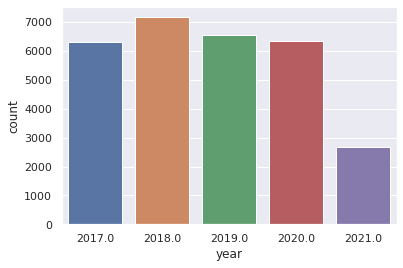

In [254]:
# 년도별 히스토그램
group_year = array1.groupby(['year_y'])['day_y'].count().reset_index()
ax = sns.barplot(x = group_year['year_y'], y = group_year['day_y'])
ax.set(xlabel='year', ylabel='count')
plt.show()

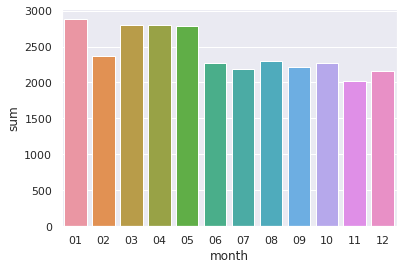

In [255]:
# 월별 히스토그램
group_year = array1.groupby(['month_y'])['year_y'].count().reset_index()
ax = sns.barplot(x = group_year['month_y'], y = group_year['year_y'])
ax.set(xlabel='month', ylabel='sum')
plt.show()

In [256]:
# 봄 : 3월, 4월, 5월 -> 1
# 여름 : 6월, 7월, 8월 -> 2
# 가을 : 9월, 10월, 11월 -> 3
# 겨울 : 12월, 1월, 2월 -> 4

def func(x):
    if (x == '03') or (x == '04') or (x == '05'):
        return 1
    elif (x == '06') or (x == '07') or (x == '08'):
        return 2
    elif (x == '09') or (x == '10') or (x == '11'):
        return 3
    else:
        return 4

In [257]:
array1['season'] = array1['month_y'].apply(lambda x : func(x))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


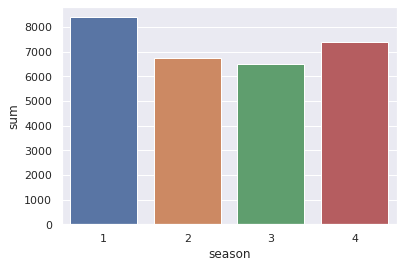

In [258]:
# 계절별 히스토그램
group_year = array1.groupby(['season'])['year_y'].count().reset_index()
ax = sns.barplot(x = group_year['season'], y = group_year['year_y'])
ax.set(xlabel='season', ylabel='sum')
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_te

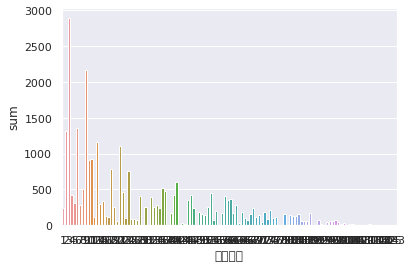

In [259]:
# 계절별 히스토그램
group_year = array1.groupby(['지정시설']).count().reset_index()
ax = sns.barplot(x = group_year['지정시설'], y = group_year['day_y'])
ax.set(xlabel='지정시설', ylabel='sum')
plt.show()

sns.pairplot(array)
plt.show()

In [260]:
corr = array1.corr(method = 'pearson')
print(corr)

                    입항횟수3     입항횟수1     입항횟수2      신고톤수      지정시설     사용목적명  \
입항횟수3            1.000000 -0.006362 -0.092918 -0.013106  0.022541  0.241277   
입항횟수1           -0.006362  1.000000  0.022832  0.003848 -0.037696  0.003513   
입항횟수2           -0.092918  0.022832  1.000000  0.281051 -0.322642 -0.091893   
신고톤수            -0.013106  0.003848  0.281051  1.000000 -0.145575 -0.044722   
지정시설             0.022541 -0.037696 -0.322642 -0.145575  1.000000  0.009677   
사용목적명            0.241277  0.003513 -0.091893 -0.044722  0.009677  1.000000   
허가유무                  NaN       NaN       NaN       NaN       NaN       NaN   
외내              -0.009363  0.158157  0.212332  0.141464 -0.156645 -0.050880   
입출               0.033504  0.089646 -0.103446 -0.054382  0.066041  0.022415   
총톤수              0.118327 -0.049420 -0.307905 -0.204906  0.292980  0.054713   
항해구분             0.044319  0.017271 -0.019473 -0.016453 -0.033808  0.008860   
국적1              0.023738 -0.054594 -0.210694 -0.130

In [261]:
array1.columns

Index(['id', '입항횟수3', '호출부호', '입항횟수1', '입항횟수2', '신고톤수', '선사/대리점1', '선사/대리점2',
       '신청시설1', '신청시설2', '신청일시1(FROM ~ TO)', '신청일시2(FROM ~ TO)', '지정시설',
       '지정일시1(FROM ~ TO)', '지정일시2(FROM ~ TO)', '사용목적명', '허가유무', '선명', '구분',
       '외내', '입출', '총톤수', '입항일시', '출항일시', '항해구분', '국적1', '계선장소1', '계선장소2',
       '계선장소3', '차항지', '전출항지', '선박용도', '승무원(한국인)', '승무원(외국인)', '승객', '예선',
       '도선', '수리여부', '일시', '풍속', '풍향', '현지기압', '습도', '기온', '수온', '최대파고',
       '평균파고', '파주기', '파향', 'year_y', 'month_y', 'day_y', 'hour_y', '시설사용시간',
       'flag', 'shipwaitingrate', 'servicenum', 'waitingnum', '사용목적명2',
       'berthoccupancy', 'month_y ', 'season'],
      dtype='object')

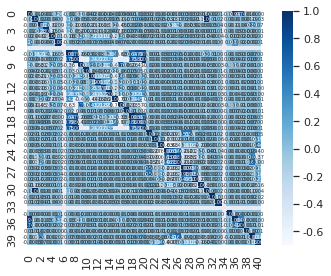

<Figure size 1440x360 with 0 Axes>

In [262]:
# 히트맵
sns.set(font_scale = 1.0)
hm = sns.heatmap(corr.values,
                cbar = True,
                annot = True,
                square = True,
                fmt = '.2f',
                annot_kws = {'size' : 5},
                cmap='Blues')
plt.tight_layout()
plt.figure(figsize=(20,5))
plt.show()


In [263]:
array1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30641 entries, 14 to 207065
Data columns (total 62 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   id                30641 non-null  object         
 1   입항횟수3             30641 non-null  int64          
 2   호출부호              30641 non-null  object         
 3   입항횟수1             30641 non-null  int64          
 4   입항횟수2             30641 non-null  int64          
 5   신고톤수              30641 non-null  float64        
 6   선사/대리점1           30641 non-null  object         
 7   선사/대리점2           30641 non-null  object         
 8   신청시설1             30641 non-null  object         
 9   신청시설2             30641 non-null  object         
 10  신청일시1(FROM ~ TO)  30641 non-null  object         
 11  신청일시2(FROM ~ TO)  30641 non-null  object         
 12  지정시설              30641 non-null  int64          
 13  지정일시1(FROM ~ TO)  30641 non-null  datetime64[ns] 
 14  지정일시

In [264]:
array1 = array1.reset_index(drop=True)

In [265]:
array1

,id,입항횟수3,호출부호,입항횟수1,입항횟수2,신고톤수,선사/대리점1,선사/대리점2,신청시설1,신청시설2,...,hour_y,시설사용시간,flag,shipwaitingrate,servicenum,waitingnum,사용목적명2,berthoccupancy,month_y,season
0,2017_001_010511,3,010511,2017,1,999.000,BSZ7247,(주)천부마린,WAE,03,...,18.0,0 days 02:35:00,0,0.161017,2,1,양하,0.001123,1.0,4
1,2017_001_020830,2,020830,2017,1,522.000,BSK2693,해운상사,MBU,01,...,9.0,0 days 06:03:00,0,1.528926,1,1,적하,0.000691,1.0,4
2,2017_001_030968,2,030968,2017,1,790.000,BSK2966,삼원해운(주),MBU,01,...,16.0,0 days 06:45:00,0,2.456790,1,1,적하,0.000771,1.0,4
3,2017_001_035669,2,035669,2017,1,1.588,BSK2531,두라해운(주),MDS,01,...,12.0,0 days 09:50:00,0,1.745763,1,1,적하,0.001123,1.0,4
4,2017_001_046316,2,046316,2017,1,1.570,BSK3224,정만해운(주),MB2,02,...,8.0,0 days 09:55:00,0,1.831933,1,1,양하,0.001132,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,2021_077_088238,2,088238,2021,77,700.000,USK0074,영우해운(주),MBU,01,...,NaN,0 days 06:40:00,0,0.350000,1,1,적하,0.000761,NaN,4
30637,2021_078_088238,3,088238,2021,78,700.000,USK0074,영우해운(주),MLJ,01,...,NaN,0 days 17:00:00,0,0.163043,2,1,출항대기,0.002626,NaN,4
30638,2021_079_088238,2,088238,2021,79,700.000,USK0074,영우해운(주),MBU,02,...,NaN,0 days 06:30:00,0,2.269231,1,1,적하,0.000742,NaN,4
30639,2021_081_088238,2,088238,2021,81,700.000,USK0074,영우해운(주),MBU,01,...,NaN,0 days 07:10:00,0,4.906977,1,1,적하,0.000818,NaN,4


## 05 Modeling

In [266]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer

In [267]:
array1.columns

Index(['id', '입항횟수3', '호출부호', '입항횟수1', '입항횟수2', '신고톤수', '선사/대리점1', '선사/대리점2',
       '신청시설1', '신청시설2', '신청일시1(FROM ~ TO)', '신청일시2(FROM ~ TO)', '지정시설',
       '지정일시1(FROM ~ TO)', '지정일시2(FROM ~ TO)', '사용목적명', '허가유무', '선명', '구분',
       '외내', '입출', '총톤수', '입항일시', '출항일시', '항해구분', '국적1', '계선장소1', '계선장소2',
       '계선장소3', '차항지', '전출항지', '선박용도', '승무원(한국인)', '승무원(외국인)', '승객', '예선',
       '도선', '수리여부', '일시', '풍속', '풍향', '현지기압', '습도', '기온', '수온', '최대파고',
       '평균파고', '파주기', '파향', 'year_y', 'month_y', 'day_y', 'hour_y', '시설사용시간',
       'flag', 'shipwaitingrate', 'servicenum', 'waitingnum', '사용목적명2',
       'berthoccupancy', 'month_y ', 'season'],
      dtype='object')

In [410]:
array1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30641 entries, 14 to 207065
Data columns (total 61 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   id                30641 non-null  object         
 1   입항횟수3             30641 non-null  int64          
 2   호출부호              30641 non-null  object         
 3   입항횟수1             30641 non-null  int64          
 4   입항횟수2             30641 non-null  int64          
 5   신고톤수              30641 non-null  float64        
 6   선사/대리점1           30641 non-null  object         
 7   선사/대리점2           30641 non-null  object         
 8   신청시설1             30641 non-null  object         
 9   신청시설2             30641 non-null  object         
 10  신청일시1(FROM ~ TO)  30641 non-null  object         
 11  신청일시2(FROM ~ TO)  30641 non-null  object         
 12  지정시설              30641 non-null  int64          
 13  지정일시1(FROM ~ TO)  30641 non-null  datetime64[ns] 
 14  지정일시

def re(x):
    if x == "외항":
        return 0
    elif x == "내항":
        return 1

array['외내'] = array['외내'].apply(lambda x: re(x))

def re(x):
    if x == "허가완료":
        return 0
    elif x == "미허가":
        return 1

array['허가유무'] = array['허가유무'].apply(lambda x: re(x))

def re(x):
    if x == "입항":
        return 0
    elif x == "출항":
        return 1

array['입출'] = array['입출'].apply(lambda x: re(x))

In [274]:
array1.isnull().sum()

id                   0
입항횟수3                0
호출부호                 0
입항횟수1                0
입항횟수2                0
                  ... 
waitingnum           0
사용목적명2               0
berthoccupancy       0
month_y           1577
season               0
Length: 62, dtype: int64

In [203]:
# x와 y로 split
x =  array1.drop(['id', '호출부호', '선사/대리점1', '선사/대리점2', '신청시설1', '신청시설2', 
'신청일시1(FROM ~ TO)', '신청일시2(FROM ~ TO)', '지정시설', '사용목적명', '선명', 
'구분', '입항일시', '출항일시', '시설사용시간', '계선장소1', '계선장소2','계선장소3', '일시', 'shipwaitingrate'],
axis=1) # input
y =  array1['shipwaitingrate'] # target

In [184]:
pd.set_option('display.max_seq_items', None)
import numpy as np #numpy library
np.set_printoptions(threshold=np.inf, linewidth=np.inf) #inf = infinity 

In [204]:
x.isnull().sum()

입항횟수3                   0
입항횟수1                   0
입항횟수2                   0
신고톤수                    0
지정일시1(FROM ~ TO)        0
지정일시2(FROM ~ TO)        0
허가유무                30641
외내                  30641
입출                  30641
총톤수                  4961
항해구분                 4961
국적1                     0
차항지                     0
전출항지                    0
선박용도                    0
승무원(한국인)             4961
승무원(외국인)             4961
승객                   4961
예선                      0
도선                      0
수리여부                    0
풍속                   1577
풍향                   1577
현지기압                 1577
습도                   1577
기온                   1577
수온                   1577
최대파고                 1577
평균파고                 1577
파주기                  1577
파향                   1577
year_y               1577
month_y              1577
day_y                1577
hour_y               1577
flag                    0
servicenum              0
waitingnum              0
사용목적명2      

In [193]:
array1.columns

Index(['id', '입항횟수3', '호출부호', '입항횟수1', '입항횟수2', '신고톤수', '선사/대리점1', '선사/대리점2',
       '신청시설1', '신청시설2', '신청일시1(FROM ~ TO)', '신청일시2(FROM ~ TO)', '지정시설',
       '지정일시1(FROM ~ TO)', '지정일시2(FROM ~ TO)', '사용목적명', '허가유무', '선명', '구분',
       '외내', '입출', '총톤수', '입항일시', '출항일시', '항해구분', '국적1', '계선장소1', '계선장소2',
       '계선장소3', '차항지', '전출항지', '선박용도', '승무원(한국인)', '승무원(외국인)', '승객', '예선',
       '도선', '수리여부', '일시', '풍속', '풍향', '현지기압', '습도', '기온', '수온', '최대파고',
       '평균파고', '파주기', '파향', 'year_y', 'month_y', 'day_y', 'hour_y', '시설사용시간',
       'flag', 'shipwaitingrate', 'servicenum', 'waitingnum', '사용목적명2',
       'berthoccupancy', 'month_y '],
      dtype='object')

In [200]:
array1.loc[array1['허가유무'].isnull(), '허가유무':'month_y']

,허가유무,선명,구분,외내,입출,총톤수,입항일시,출항일시,항해구분,국적1,...,현지기압,습도,기온,수온,최대파고,평균파고,파주기,파향,year_y,month_y
14,NaN,금창호,최종,NaN,NaN,999.0,2017-01-01 08:35,2017-01-01 21:20,0.0,1,...,1026.1,52.000000,11.1,16.0,1.2,0.5,6.4,160.0,2017.0,01
28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,1022.4,60.000000,10.3,16.0,1.8,0.8,4.6,319.0,2017.0,01
43,NaN,삼원골드,최종,NaN,NaN,790.0,2017-01-01 23:15,2017-01-02 22:45,0.0,1,...,1020.0,50.000000,12.9,16.0,0.9,0.4,5.8,179.0,2017.0,01
48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,1023.0,59.000000,10.3,17.0,1.6,0.8,4.0,16.0,2017.0,01
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,...,1029.6,57.265335,7.2,16.0,2.5,1.1,10.7,74.0,2017.0,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207054,NaN,3동주,최종,NaN,NaN,700.0,2021-06-16 21:00,2021-06-17 06:10,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207057,NaN,3동주,최종,NaN,NaN,700.0,2021-06-18 20:15,2021-06-19 19:25,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207059,NaN,3동주,최종,NaN,NaN,700.0,2021-06-21 00:45,2021-06-21 21:55,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207063,NaN,3동주,최종,NaN,NaN,700.0,2021-06-24 19:50,2021-06-26 14:00,0.0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [201]:
array1

,id,입항횟수3,호출부호,입항횟수1,입항횟수2,신고톤수,선사/대리점1,선사/대리점2,신청시설1,신청시설2,...,day_y,hour_y,시설사용시간,flag,shipwaitingrate,servicenum,waitingnum,사용목적명2,berthoccupancy,month_y
14,2017_001_010511,3,010511,2017,1,999.000,BSZ7247,(주)천부마린,WAE,03,...,1.0,18.0,0 days 02:35:00,0,0.161017,2,1,양하,0.001123,1.0
28,2017_001_020830,2,020830,2017,1,522.000,BSK2693,해운상사,MBU,01,...,2.0,9.0,0 days 06:03:00,0,1.528926,1,1,적하,0.000691,1.0
43,2017_001_030968,2,030968,2017,1,790.000,BSK2966,삼원해운(주),MBU,01,...,2.0,16.0,0 days 06:45:00,0,2.456790,1,1,적하,0.000771,1.0
48,2017_001_035669,2,035669,2017,1,1.588,BSK2531,두라해운(주),MDS,01,...,4.0,12.0,0 days 09:50:00,0,1.745763,1,1,적하,0.001123,1.0
67,2017_001_046316,2,046316,2017,1,1.570,BSK3224,정만해운(주),MB2,02,...,18.0,8.0,0 days 09:55:00,0,1.831933,1,1,양하,0.001132,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207054,2021_077_088238,2,088238,2021,77,700.000,USK0074,영우해운(주),MBU,01,...,NaN,NaN,0 days 06:40:00,0,0.350000,1,1,적하,0.000761,NaN
207057,2021_078_088238,3,088238,2021,78,700.000,USK0074,영우해운(주),MLJ,01,...,NaN,NaN,0 days 17:00:00,0,0.163043,2,1,출항대기,0.002626,NaN
207059,2021_079_088238,2,088238,2021,79,700.000,USK0074,영우해운(주),MBU,02,...,NaN,NaN,0 days 06:30:00,0,2.269231,1,1,적하,0.000742,NaN
207063,2021_081_088238,2,088238,2021,81,700.000,USK0074,영우해운(주),MBU,01,...,NaN,NaN,0 days 07:10:00,0,4.906977,1,1,적하,0.000818,NaN


In [187]:
from sklearn.model_selection import train_test_split

# 데이터셋 train, test으로 split 
x_train, x_test, y_train, y_test = train_test_split(
    x, y, random_state = 35, test_size = 0.25)

#### RMSLE

In [188]:
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [189]:
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

##### - Linear Regression

In [190]:
lModel = LinearRegression()

# Train the model
lModel.fit(X = x_train,y = y_train)

TypeError: invalid type promotion

In [ ]:
lModel.fit(x_train,y_train)
lModel_train_pred = lModel.predict(x_train)
lModel_pred = np.expm1(lModel.predict(x_test.values))
print ("RMSLE Value For Linear Regression: ")
print(rmsle(y_train, lModel_train_pred))

##### - Lasso Regression

In [ ]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=3))

In [ ]:
lasso.fit(x_train,y_train)
lasso_train_pred = lasso.predict(x_train)
lasso_pred = np.expm1(lasso.predict(x_test.values))
print ("RMSLE Value For Lasso Regression: ")
print(rmsle(y_train, lasso_train_pred))

##### - Elastic Net Regression

In [ ]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [ ]:
ENet.fit(x_train,y_train)
ENet_train_pred = ENet.predict(x_train)
ENet_pred = np.expm1(ENet.predict(x_test.values))
print ("RMSLE Value For ENet Regression: ")
print(rmsle(y_train, ENet_train_pred))

##### - Kernel Ridge Regression

In [ ]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5) #kernel = 'rbf' , 'sigmoid' 

In [ ]:
KRR.fit(x_train,y_train)
KRR_train_pred = KRR.predict(x_train)
KRR_pred = np.expm1(KRR.predict(x_test.values))
print ("RMSLE Value For KRR Regression: ")
print(rmsle(y_train, KRR_train_pred))

##### - Gradient Boosting Regression

In [ ]:
GBoost = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=4,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             presort='auto', random_state=5, subsample=1.0, verbose=0,
             warm_start=False)

In [ ]:
GBoost.fit(x_train,y_train)
GBoost_train_pred = GBoost.predict(x_train)
GBoost_pred = np.expm1(GBoost.predict(x_test.values))
print ("RMSLE Value For GBoost Regression: ")
print(rmsle(y_train, GBoost_train_pred))

##### - XGBoost

In [ ]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [ ]:
model_xgb.fit(x_train, y_train)
xgb_train_pred = model_xgb.predict(x_train)
xgb_pred = np.expm1(model_xgb.predict(x_test))
print(rmsle(y_train, xgb_train_pred))

##### - LightGBM

In [ ]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [ ]:
model_lgb.fit(x_train, y_train)
lgb_train_pred = model_lgb.predict(x_train)
lgb_pred = np.expm1(model_lgb.predict(x_test.values))
print(rmsle(y_train, lgb_train_pred))

##### - Random Forest Regressor

In [ ]:
regr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=60, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [ ]:
regr.fit(x_train, y_train)
regr_train_pred = regr.predict(x_train)
regr_pred = np.expm1(regr.predict(x_test.values))
print(rmsle(y_train, regr_train_pred))

In [ ]:
# 예측 결과
y_pred = linear_model.predict(x_test)
y_pred

In [ ]:
# 결과 제출
submission['pred'] = y_pred.astype(float)
submission.dtypes

In [ ]:
# 데이터베이스로 결과 insert
cur = conn.cursor()

# insert
cur.execute("INSERT INTO pred (")
weather = pd.DataFrame(list(cur.fetchall()), columns=['지점', '일시', '풍속', '풍향', 'GUST풍속', '현지기압', '습도', '기온', '수온', '최대파고', '유의파고', '평균파고', '파주기', '파향', 'N'])

# weather 데이터 '일시'를 기준으로 sort
weather.sort_values(by=['일시'], inplace=True)

# index reset
weather = weather.reset_index(drop=True)

weather